In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Pytorch Imagefolder for loading data

In [ ]:
dataset_path = '/content/drive/MyDrive/PRML Project/covid 19/Extensive COVID-19 X-Ray and CT Chest Images Dataset.zip (Unzipped Files)/COVID-19 Dataset.zip (Unzipped Files)/COVID-19 Dataset/X-ray'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
from torchvision.transforms.transforms import RandomHorizontalFlip
dataset_transforms = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

In [ ]:
dataset = torchvision.datasets.ImageFolder(root = dataset_path, transform = dataset_transforms)

In [ ]:
dataset[0]

(tensor([[[0.6706, 0.4824, 0.4627,  ..., 0.4706, 0.4588, 0.7451],
          [0.4275, 0.0196, 0.0275,  ..., 0.0118, 0.0157, 0.5647],
          [0.4118, 0.0275, 0.0157,  ..., 0.0118, 0.0196, 0.5725],
          ...,
          [0.4863, 0.1451, 0.1765,  ..., 0.1608, 0.1137, 0.6118],
          [0.4863, 0.1490, 0.1804,  ..., 0.1608, 0.1059, 0.6039],
          [0.6784, 0.4627, 0.4863,  ..., 0.4667, 0.4353, 0.7529]],
 
         [[0.6706, 0.4824, 0.4627,  ..., 0.4706, 0.4588, 0.7451],
          [0.4275, 0.0196, 0.0275,  ..., 0.0118, 0.0157, 0.5647],
          [0.4118, 0.0275, 0.0157,  ..., 0.0118, 0.0196, 0.5725],
          ...,
          [0.4863, 0.1451, 0.1765,  ..., 0.1608, 0.1137, 0.6118],
          [0.4863, 0.1490, 0.1804,  ..., 0.1608, 0.1059, 0.6039],
          [0.6784, 0.4627, 0.4863,  ..., 0.4667, 0.4353, 0.7529]],
 
         [[0.6706, 0.4824, 0.4627,  ..., 0.4706, 0.4588, 0.7451],
          [0.4275, 0.0196, 0.0275,  ..., 0.0118, 0.0157, 0.5647],
          [0.4118, 0.0275, 0.0157,  ...,

In [ ]:
dataset[0][0].shape

torch.Size([3, 224, 224])

In [ ]:
torchvision.transforms.Grayscale()(dataset[0][0]).shape

torch.Size([1, 224, 224])

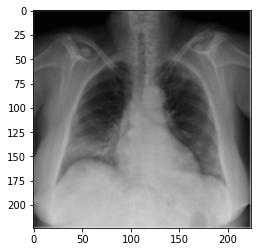

In [ ]:
plt.imshow(dataset[0][0].permute(1, 2, 0), interpolation='bicubic')

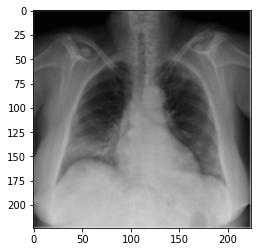

In [ ]:
plt.imshow(transforms.ToPILImage()(dataset[0][0]), interpolation="bicubic")

In [ ]:
len(dataset)

9537

In [ ]:
train_size = int(0.7 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size,test_size])

In [ ]:
def split_XY(dataset):
    l = []
    a = torch.Tensor(len(dataset), 1, 224, 224)
    for i, (image, label) in enumerate(dataset):
        # a[i, :, :, :] = image
        a[i, :, :, :] = torchvision.transforms.Grayscale()(image)
        l.append(label)
    return a, torch.Tensor(l)
X_train, y_train = split_XY(train_dataset)
X_test, y_test = split_XY(test_dataset)

In [ ]:
X_train.is_cuda

False

In [ ]:
cuda = torch.device('cuda')

In [ ]:
X_train.shape, y_train.shape

(torch.Size([6675, 1, 224, 224]), torch.Size([6675]))

In [ ]:
X_test.shape, y_test.shape

(torch.Size([2862, 1, 224, 224]), torch.Size([2862]))

In [ ]:
X_train = torch.Tensor(X_train).to(cuda)
X_test = torch.Tensor(X_test).to(cuda)

In [ ]:
X_train.is_cuda

True

In [ ]:
X_train.shape[2], X_test.shape[2]

(224, 224)

In [ ]:
X_train1 = torch.reshape(X_train, (X_train.shape[0], X_train.shape[2]*X_train.shape[3]))
X_test1 = torch.reshape(X_test, (X_test.shape[0], X_test.shape[2]*X_test.shape[3]))

In [ ]:
X_train1.shape, X_test1.shape

(torch.Size([6675, 50176]), torch.Size([2862, 50176]))

In [ ]:
y_train1 = y_train.to(cuda)
y_test1 = y_test.to(cuda)

In [ ]:
X_train_np = X_train1.cpu().detach().numpy()
y_train_np = y_train1.cpu().detach().numpy()
X_test_np = X_test1.cpu().detach().numpy()
y_test_np = y_test1.cpu().detach().numpy()

In [ ]:
X_train_np.shape

(6675, 50176)

DTC

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
clf = DecisionTreeClassifier().fit(X_train_np, y_train_np)
y_pred = clf.predict(X_test_np)
y_pred_proba = clf.predict_proba(X_test_np)
print(classification_report(y_test_np, y_pred))

              precision    recall  f1-score   support

         0.0       0.78      0.72      0.75      1235
         1.0       0.80      0.85      0.82      1627

    accuracy                           0.79      2862
   macro avg       0.79      0.78      0.79      2862
weighted avg       0.79      0.79      0.79      2862



[Text(0.5, 1.0, 'CM for DTC')]

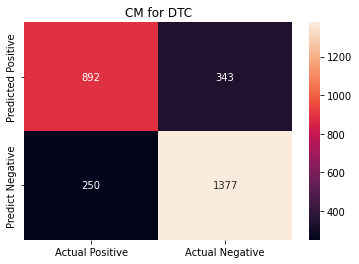

In [ ]:
cm_matrix0 = pd.DataFrame(data = confusion_matrix(pd.Series(y_test_np, dtype=int), pd.Series(y_pred)), columns = ['Actual Positive', 'Actual Negative'], index = ['Predicted Positive', 'Predict Negative'])
sns.heatmap(cm_matrix0, annot=True, fmt='d').set(title='CM for DTC')

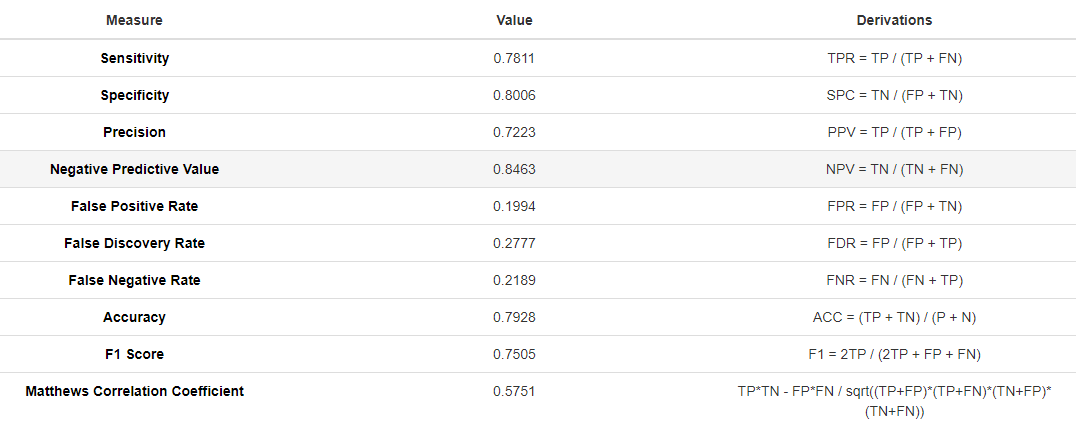

In [ ]:
print(roc_auc_score(y_test_np, y_pred_proba[:,1]))

0.7842212263200197


In [ ]:
print(roc_auc_score(y_test_np, y_pred))

0.7843050844927077


RFC

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier().fit(X_train_np, y_train_np)
y_pred_rfc = clf.predict(X_test_np)
y_pred_proba_rfc = clf.predict_proba(X_test_np)
print(classification_report(y_test_np, y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83      1235
         1.0       0.86      0.89      0.88      1627

    accuracy                           0.86      2862
   macro avg       0.86      0.85      0.86      2862
weighted avg       0.86      0.86      0.86      2862



In [ ]:
print(roc_auc_score(y_test_np, y_pred_proba_rfc[:,1]))

0.9347725253751845


In [ ]:
print(roc_auc_score(y_test_np, y_pred_rfc))

0.8532977164200275


[Text(0.5, 1.0, 'CM for RFC')]

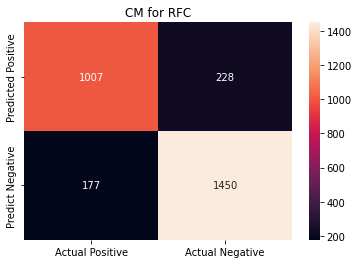

In [ ]:
cm_matrix1 = pd.DataFrame(data = confusion_matrix(pd.Series(y_test_np, dtype=int), pd.Series(y_pred_rfc)), columns = ['Actual Positive', 'Actual Negative'], index = ['Predicted Positive', 'Predict Negative'])
sns.heatmap(cm_matrix1, annot=True, fmt='d').set(title='CM for RFC')

Evaluation metrics:

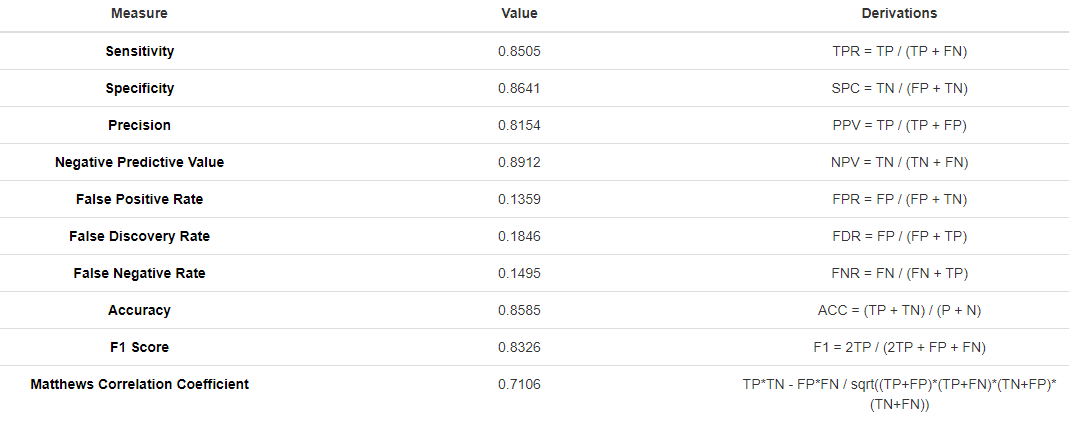

Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB().fit(X_train_np, y_train_np)
y_pred_gnb = clf.predict(X_test_np)
y_pred_proba_gnb = clf.predict_proba(X_test_np)
print(classification_report(y_test_np, y_pred_gnb))

              precision    recall  f1-score   support

         0.0       0.65      0.62      0.64      1235
         1.0       0.72      0.75      0.74      1627

    accuracy                           0.69      2862
   macro avg       0.69      0.69      0.69      2862
weighted avg       0.69      0.69      0.69      2862



[Text(0.5, 1.0, 'CM for GNB')]

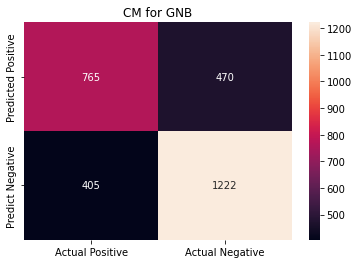

In [ ]:
cm_matrix1 = pd.DataFrame(data = confusion_matrix(pd.Series(y_test_np, dtype=int), pd.Series(y_pred_gnb)), columns = ['Actual Positive', 'Actual Negative'], index = ['Predicted Positive', 'Predict Negative'])
sns.heatmap(cm_matrix1, annot=True, fmt='d').set(title='CM for GNB')

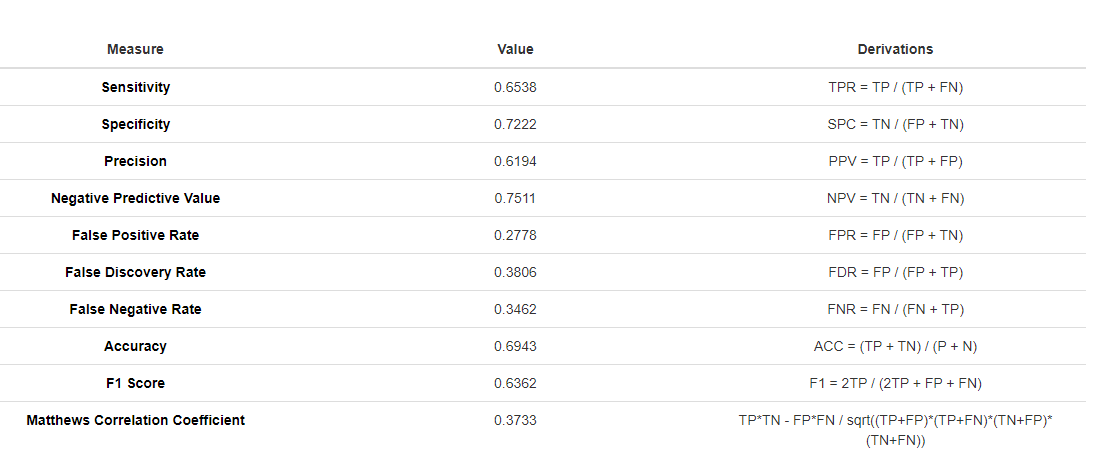

In [ ]:
print(roc_auc_score(y_test_np, y_pred_proba_gnb[:,1]))

0.6878146858802245


# PCA of pytorch

In [ ]:
# m = X1.mean(0, keepdim=True)
# s = X1.std(0, unbiased=False, keepdim=True)
# X1 -= m
# X1 /= s
# X1.shape
# U, S, V = torch.pca_lowrank(X1, q=min(X1.shape[0], X1.shape[1]), center = True, niter = 100)
# S.shape
# eigenvalues = S
# eigenval = eigenvalues.cpu().detach().numpy()
# loaded_vals = eigenval/eigenval.sum() 
# loaded_vals[:2114].sum()
# np.array([i for i in range(1,2115)]).shape
# loaded_vals.shape
# plt.bar([i for i in range(1,2115)], loaded_vals[:2114])
# S
# eigenvectors = V
# indexsort = torch.argsort(S, descending=True)
# indexsort
# sorteigenvalue = eigenvalues[indexsort]
# sorteigenvectors = eigenvectors[:, indexsort]
# sorteigenvectors.shape
# X1.shape
# eigenvectorsubset = sorteigenvectors[:, :2114]
# eigenvectorsubset.shape
# pca_x = torch.matmul(X1, eigenvectorsubset)
# pd.DataFrame(pca_x.cpu().detach().numpy())
# pca_x.shape

## Kmeans sklearn on PCA pytorch

In [ ]:
# from sklearn.cluster import KMeans
# pca_x_np = pca_x.cpu().detach().numpy()
# pca_x_np.shape
# kmeans = KMeans(n_clusters=2, random_state=0).fit(pca_x_np)
# y_pred_np = kmeans.labels_
# y_pred_np
# y_true = y.cpu().detach().numpy()
# from sklearn.metrics import confusion_matrix
# cm_matrix2 = pd.DataFrame(data = confusion_matrix(pd.Series(y_true, dtype=int), pd.Series(y_pred_np)), columns = ['Actual Positive', 'Actual Negative'], index = ['Predicted Positive', 'Predict Negative'])
# sns.heatmap(cm_matrix2, annot=True, fmt='d').set(title='CM for Kmeans')
# Evaluation Metrics on preserving 98% variance:
# ![image.png](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABKsAAAHhCAYAAAChhT0lAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAADsMAAA7DAcdvqGQAAH9mSURBVHhe7f3NTxx3+vh7X5x/AcnCsRO5I2+/yBqzMOBk0UqE5Fu3UUCOEtxG+oJ17sXcg60om58MLBqss4lisDSLc2T4SjYmUSyYYB1ZQrF6kbgbL1DGYaSzctRRYo89Vvgb+tTnqbqquqofoIECv1+jGroeurqq2vlU11XX9amOikcAAAAAAACAFPjf7F8AAAAAAADgwBGsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrMLBerMm13p6pEcP12TtjZ2uPJuz071hYk227WQAwNG1/fCaafdvb9kpVVu3zTnh2sP6ZwS3jkbLAQBa47fR0aEdv9XddUEbf/er7fXPBXuwfgB7h2AVUqQo5X/bl56tH5fsKwDA26LzXFb61Yu7BQmHq7akcFf9zcn4xU49BQCQEqUZGeiZi7TbLTo2KPObm7J5e1Da0cqrQNVAvmjHPG1eP4C9RbAKqbL0ozvFuYuSGKFsrOid821Zm6jOq52/JXOBeeFsLjcvcKK12V21d2TmZM5+jpkXWW9MRgAAoAnHzku2T71YksIzPcV4VvCmeEaz0u39qbm7X+dOeW2mlTtXBC+saMcBoFn90+uyqQI/eliXKdtujwXaznA7Ha6gcJmyc7ddJYXXHgczn9zrYFtckxmV/Ls/GKgq5gfC6wydL6LrCAfc/O18aN8bs0zN+YjzB9AWBKuQDn05yamTnLuT/qYsZe9P/2jO3GF31EnmwowE7pHoE9CcvaDZuj0gMyXz2inm8/bkqE5GY+Zix1eUmQvhE05TSkuypD+nX7LnXnoXOJH13h2LBMkAAM3plMGxnH61tBi4IFk0rWzuw259IyF0t1wpzUh+x+2uClTRjgPAznjt9uSU+c3+vKzb7WCwyIj/zb1017a89kaEz924CGTZbj8t6GuA/o/O68yo+r/7m6GuDaLrWJKxaNcknqV88PojEJSLOx9x/gDagmAVUiIj2Y/UKa4sZe/kYE5G/ZL9MGNmW+4klbvj7uQsirqkcRc03RNuuhkWR9W7wuWFqoRkMbDM5ub18MmxKf0y9Ui9d14G/23u9lfvMJm7S8X8vdaDYAAAkTNZ3bZLqSBP1AXDmydS0BcTOcme8f6cuW7bWzvcMcGt4m8v9d+W2awt2nEA2KFjGe/XvKdUlpfer/Inj/Uv9upvbt1OL8lCNIgzumjmT0R/jXfKeX1t4LJs3TrVjWJTxFfvd3/nxXlZnza3vHXbHlf69+yeCVT1Tcm6XYd5T1Fmvo20/m477fnGBeWccKbZpsxTrg7sGsEqpMaJ99QpriiFp1v2ZOSd9N7Rs3wvfzN3LpauulRbeydcnxirXDruWKiUsHrSG3NpunXKRurqy8r5Y+bl9u8qB0xd1AzYbXJ3aEzgDQDQqm7J2ouOwtPt6t306SvhmwuupONqKCeqZbTjANBOL6Ws29DAb27bTkdvKuhs2QSuD0PdTYi7aTE6LoP2N7gT/7u/Mdc/bm6sGsjqvDhubpZEglH+drqbKY4dr54/evyKDwC7Q7AK6eEa+8cL9mQUSQeuy1xQuLrye+/N67sa5g5LlbrLEpquO4OsTfV13AXMzkQzugAAzer+0FwOFB/fk3uRu+n+02K/zZjOct2d7qa5C6lGaMcBoCm2Cw/py8gJPSFBJAhUV6AUcM1VVwSCW41+9zdy4pTJvNqdbrmuzkOPbBmkR99Up98qYNcIViFFTkhGnZBKRXMH/VTtqc6dVKplgG6Yl8Fj1SdF6TIR71RYfq7+1nJpwy7VV925r3J30l26cX2dOiOsNv1XDdf1dgAAWuaXAto+AgMZrf7dcHvR0uyNBf+Ovuus3aIdB4Dd2frW9Olk+pOyv+m9Vjzc9YY3tPQkvmpVxIzuF8r9xlea/92fxLX91f4RvbU8XDDnh9OZFrbT4540aLsoqX2iLYBWEaxCirgTkhK4gx7gpwP7ZYB2CN29cCnH0Q4To08C7LEdIrrPcidW1QFk3PsTxKT/6mGnJYYAAE+3XLH9jSjBMg3HnQtqOreNcBckqtNb3T5HywZpxwGgJdH20pTg5WRc99UU0/WGHVotkfPL8pTYqouk3/1VZltjHqh05op5iqGutDDb564Npj5rrr6j5kmArouSlipEAMQhWIVUccGo4B30EHXXIpBmq6lOEXWnjN1yPVgKoqbbZXWtu07TtXc7AnJ3VFaWehV4komWk8WmSkvi1uu9t6U7RwCAKP+c4LWp1bvpKjs22OaqB17Yx6Yn3ck+cz1UHtI/vWgfs+7QjgPAruhOyqsPLQp2cO6o7NXWs1VdH4Zeqxzq36rR7/5IoCuW99v/tj1/+FQ2mLs2aCxuP6vXJgB2o6Pisa8BAAAAAACAA0VmFQAAAAAAAFKDYBUAAAAAAABSg2AVAAAAAAAAUoNgFQAAAAAAAFKDYBUAAAAAAABSg2AVAAAAAAAAUoNgFQAAAAAAAFKDYBUAAAAAAABSg2AVAAAAAAAAUoNgFQAAAAAAAFKDYBUAAAAAAABSg2AVAAAAAAAAUqPj119/rdjXAAAAAAAASLn333/fvjqayKwCAAAAAABAanRUPPY1AAAAAAAAcKDIrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGp0VDz2NbDnXn8zLMdHVu2YyNDyK1n5vMuO7bUNudnRJ5MyK6XKDen1pxUka8fd9jW7XRszHdI3LTK7UZEb59SU17L86V9Fvl6RkZN6EQBAU7ZlbWJAZkp2dHRRNie67UicLZnrGZMlOyZ9U7J+e1A67ej2w2sykC/asX6ZejQvg8fsaIhZj9zZlOtn7KTIuvun12X+olszAKTAsznpueq3gDVMu/Uy3E4G5Pw2L9L2BkXa1d3Yut0jY3ftSA3bRv87aZ9ysrh5XeqeEbz1Fz4MtuNhav7CqW8l+/iz+H3V7OckHtvG29G0Ot+f+e7EfC8S8x3o94q/LY32HTi0VLAK2BcbsyowWjMMLb+yC+y3UmVWb8Os96odXlXuX1LrG6rc/8NOAgA05Zf5s5Wz87/YsT8r3//tbGVi7U87HmXmV5cPv//PtYnK2bO3Kv7cf94Kjwfo9509W7n1TzvBW+qWNx5dd/K2AMBBU+3WROX7/9hRX8L0/3xfmfDbPdOeVttAp7adbRvVJv/te+8TIhKm17TpNdR+1pmv1huzH3q9cfu34+1oQdIx8Nnj731PNecf9d7QdjTYf+CQogwQ+2bjh0n9V2Uhef/2pLIxq8dX/1GQ1/qV58WyDHd0SIcdhr/x5+isJzNtWW76ywzL8gu7gKYyparvD8938256r1yWlTIpfd70m0+Dn+F9rtuWmQ29lOamfbqst1llVqnlbz5VGVXH5fIDtdCqXH5XreP/DnyeE9wGAID2Zk0W7vbL1GfufnWnDI7lpPj4iWzbKSHP7slMKSeLgcyr7olNm4m1LU8eF6V/+kr17veZKzLVtySFZ3bceTYnY5Lz/hfwrCBL6u55cN2fTYnk78mWHQeAQ+3YoIyPipR/j21hLdMOy93Cgbd9nRfHvVa5LOU3dkKUardHswkZT9uytlgOnF92ruF2aCoz95qs1V2meblR71yYzzdYX7dcmS7L2G3OUjhaCFZh32ROD+m/k702UHPuhglafTciuuBOBYLevSzVIkGR1ZHjOogUtDpy2QaZlFW5/IUJHJkSPBeAclTgaIeBoZNZGb7k/Z0u+O9//dOK3r6hT7Jmm+vqkWxe/Z2UgtuHpwWzffmsLUMEAMi/y1KUjGSCZXrvZKS/VJAnMT/Qt35cEkm8MPEusG5vRsr2Xkq5puzDu6BQZRQTWTse0JeRE/ZlVaMLFAB4i6hStJ6e2GEuemNgj6lzQu7DhGCUurkhWTkfWwZ+CHx4XRZHizIzuxZ/88bqPJeV/hQEFoF2IliFfdP1wbDYcJXOZNKZT4GsJRcI8jOvKiVRuVeTX7tglHXpvrxS8/+4b9b3wLuA0DMc1SeVW4caXP9UQb1yw67fLW/6nArqkuwn6hNcsOm1FP6hQ1Uy/EE0VNUlI9+9kvsquOXNv/9HRfd51fux+YSfy2YP/OyyjwlVAUBINEB0LCMZ+zJO/6kTup8O/wKpzh3l7YcLstQ3JVcC/XmoaeVg9pVzJiu50ozkH1YvC7a+nRHX+xUAHHoqq/Ruv2TP1euNSmUk1bkxcOa6bG5uxg7t7jtp6/aY14YnBZy2pfy8XzLv2NGI7d+9q4TTmTb1u1VvO3bAO9cMBIJ8Seey7onFmvNSDX3OjMkgBg4xglXYPydHZMUPEFnTfX5JXfm5yama7LWBLFemFwlG+VlNLvPJVw0u+cEwu+6dcgG2yR82RF4UZEWV+eW/bL7z9HNZvb+m1PG1lP+lJs56Pw7UXwDAThXzA7pDWXNxtC5Tz8dif+SbjtZFpiYDHdS+WZP846xMx3aa3i3XH6myvwH/4qHwoXehYOcCwOFSlJkLkYDI1SXJ3Qk/dGLpamSZngGZOd3oQRd7ICaAM3Y3J4tJHb2/eSKFOplTL38r6psbLWtpO1Qn9W451aF98JjPJWc7qQ7sI4G++OPtnZfuNCoHPCGZvkalncDhQrAK+0xlNNmMJ9tnlTxYkUKo36mon6Vcd35V1+cret0lXX7neXBZjtf0a9WCQCngssv8aikrqteUAqp9fOqCXZQAAkCNUlle2pfam2jWbJh6WlL17n183yp+oCr0JEDvomLWu7QJBq+ijg3KfODi4fo7alsiZYoAcCioJ+0FgiGuXYtkP6mnA7p569P93pRgP4Ix9qoMMC6AU+cJfNve72v56HxCe66yruzLVrW0Hab83Cyjbm4Ej3mbnh54plE5YKdkTtuXwBFBsAr7RPUnpbKdAoGjc+O2bM5wfVpVywDdsNJ8JpPVO2Xe+2pZrXNVVn7aaX5VNVvr8ogOVbWcFWVKAVflcq/pj4sSQACIUP1TRfuEUv1YJZRbnDjVL8XfQqGtGqpEcCCfkcXNcPaAvgtfCt71No91V1kF1xJKLNTFUDG2HysAOHo6L86bwMiFOllB+1gGmEw9UEPqlDMerQCOXw64GHcrZxeBOSClCFZhn7igj3lSninzs0/PuzQs2ZOBkju/DNAOwafx1RV9EmCHHNcBprg+poJM2WDwyYNBXZ9/WS1dbCoryu6j225bCmhQAggANfSTqbwLo2/dZZHpK6U/4W65fiLT3bHA3ftw3yoqo0qXa8Td0Y5kTZm74CarwHTKrp7kFMgMUCWD+aLkxupkYgHAEaMDI7IkYxP1O/Y+WOrhGfWzXpu5uXF42HLAUlwviuZBIpn3OFPh6CBYhX2jSvRMplOA6izdPQ1Q9WnlOk131PypZjORgp2mV81uJGVm9cp4dHti2VI+T/2sqC4Z+SL66Ur1/ZQAAkC87gnb75TOdjJ9pVSf6BcJIKkf7JuLIn4fK8G+VbbkXl79kPcusvS86pCUORVm+qwqu3VfmBEJlRwCwNvAtIX9qu+mOg+wOFDPCrKU+GRYo/O9jMjz8j4G3NT5KZLR2066HNC+DtKl8znJcq7CEdJRUbVSAPbUxkyH9E2rwFncUwcBAAAAtJ/q/HxAymP7WZ64/1RGcV6mAzd5gMOPzCpgz21IYVr9pQQQAAAA2D/mARxLP6Y0O6wtVEZxRsYJVOGIIVgF7KHX3wxLR0efTHqvZzduUAIIAAAA7CdVOidjTZaCHz5bt8dE7rTpqYNAilAGCAAAAAAAgNQgswoAAAAAAACpQbAKAAAAAAAAqUGwCgAAAAAAAKlBsAoAAAAAAACpQbAKAAAAAAAAqUGwCgAAAAAAAKlBsAoAAAAAAACpQbAKAAAAAAAAqUGwCgAAAAAAAKnR8euvv1bsawAAAAAAAKTc+++/b18dTR0Vj30NAAAAAAAAHCjKAAEAAAAAAJAaBKsAAAAAAACQGgSrAAAAAAAAkBoEqwAAAAAAAJAaBKsAAAAAAACQGgSrAAAAAAAAkBoEqwAAAAAAAJAaBKsAAAAAAACQGgSrAAAAAAAAkBoEqwAAAAAAAJAaBKsAAAAAAACQGgSrAAAAAAAAkBoEq7CvXn8zLB0dHf4w/M1rO2c/bMhN/bk3vVdGaHs+XZYtO97sdm3MmPfefGonyGtZ/nRYll/YUQBAk7ZlbaJHenrscHvLTq+1/fBadbnQMCc173o2Jz0Ta97aw0LrqJkf2Za49QLAQXuzJtf8dsoMc8/sPG1L5iLz45dTou1ej1x7GG05d27rdnjd4eGarL3xFlLttTeetG2Ntkd9Ru17q9R8s47afa0Otr2325I4f7cS128Gs532+4s5H+pzmH/uUstxnsIRVAH2y8ZsRf2Tiw5Dy6/sAvvtVeX+JbUNs5WSnbI7bn1Dlft/2EkAgKb8Mn+2cnb+Fzv2Z+X7v52tTKz9accb+aVy62zM8v+8VTnrTT/7t++9NVb9uTbhTb/lvcsIf7YdD7xHLx9ZBwAcqP98X5k4O1H5/j92XNHTgm2hahsjyyh2uVv/DI+H21DTrgbbxrZRbXNcm+ra7ED7bDRzTlDbG31fgFp35Bzj73+chG2Mnj/aI+F70tPV8ajd1przUmj/gKOBzCrsm40fJvXf2Y2KCpJKZWNWj6/+oyA6j+nFsgzbDKdlm7EUl+XkspnMUM2ScsLZW8Esp2BmlXp9XC4/UNMnpc+brj7HvTf0mU9vBtYXzKIKZlapjCq3vlW5/K5ax/9dk8kV3gYAgPZmTRbu9svUZ912QqcMjuWk+PiJvWtc39btMVnqm5Lpi51uirkbfbUsudF+O83ZliePi9I/fUXcp3V/mBO5WzB3pd22TA56W2F0XpyXzdvVcQA4aNtPC1Lsy8r5Y3aCcmxQpqf7G7ed3nLjoyLl322W0eyMyPS6zPttqNIt1x9NSf/dBZP1tF/6cpLrW5KxOtm1sZ4VZGk067frYd4+LpYD55id67w4LjkpS7nuMVHnIJsttmv9+jy2dLVB5tSZKzL1fKxuZhlw2BCswr7JnB7Sfyd7baDm3A0TtPpuRLr0HOvBZbk8bV97VkeO+wEiFRzqC8zTgaZPl02wy6OCTcdHVu2YogJHuyjLU4GqXhNkcyZ7wwGrZD2Szau/k1Jwy3s/LPTa8lnp1RMAAPLvshQlI5ngRdc7GekvFeRJox/7McElJeNdeG1uzsuVU3aCr1MGb2+GLsq2flwSsRc5sReAAJAyne9lREozci8SnGg5uP7miRRK/ZI9F/OOY4My77Wjg3HtYZ0ytt0FTDJyZVIFyVoLvKh2PPdhQjDq2T2ZkcPbrmc+m5aphgG8Tjn/Ub8s/UgxII4OglXYN10fDIsNV+lMJp2pNBOXXzQk9/8w2Vevlu07flDLbUhBBaou3ZdXKsjl5j+4LAs6GLQhCzpQFX3/qqz8FO2DqlduVEpicrtmpeQtu/J5KGTmeS3LX8dng5ntCeqSke9eyf1L6rX5fLW+3o/N8j+Xzef72WUfE6oCgJC+jJywL7VjGe+SpbGtb2ekODoeuZjqlsFQhkA812/V2N2cLE4ELnJOe59ct08rADhgZ67L+rTKuAkEipptq57Nee2eDVDF3Sxohvf5m5ubscP1M3aZnbIZYg2ziXzbUn7eL5l37GjE9u9l3a5HzwqhY6eHxtlQJpN3vwNfnTLYRABPBzBdljBwBBCswv45OSIrfoDImu7TZX+hUFL+Sxk5aV52ff6lWf5fZXn9oiw/q9cPLstxG+xyWVQ6GOTmXxqWrP/+FR1kqg1ENaMsZV3WN+udzPWEajbYVJPBpnNZvf2m1PG1lP+lJgbWBwDYhS0p3JXku+kN6AwEdXH1KCMLwYsU74IgL9P+hdfi6RkZIGAFIGX8Nky1U6PehJLXVvVEOyIvysyFSFDm6pLk7iRkTKVE58VmsokslR1WJ3Pq5W9F6T8Vuh2i5e5UA2xmiBwTezyDx07f3IjNXAt22j4mS6Hj3obOz5sJ4KmM5IYlisDhQbAK+0xlNIWzlOTBihSCZXoqMGVfNmv1edm+SpteUwqo9vFpQVZU8IsSQACoVSrLS/tSe+P94LYvE6k+SiQn2V3fxT8v2b6i107bC7zRxVCZYPdnU82VJALAAemesAGXOzkp5u8FAhr9MvUoGJAxg5/9tNMAx56VATrNZRMpqnxbPjofE0BSVNaVfdmqvilZjxy3zc3rCf1imRJzs8yid2YKHvek97SmYQCvyYxk4LAgWIV9ojogV9lQgf6jzo3bsrmIQPDq9TdfmT6e/isjXScz8hf1OlAG6A8q08nN98sCPa5z9Nhyw0a8Bl9v36R85TpcD3QC32xAzZQCrsrl3sve/1MCCAA14i6WVGlKg1KLYF9TzTOdrydd/OgyiudlsqgApJjJ4glnUFmtBp+iwfqQOu3lXpYBOn42UV4KdlIt9dAMie9zS+uUzGn78tCrBvDy3j7XaOYmD3CIEKzCPumS7Cem/yj1pDwdQHJP4wuU7RnVZVyZnwnwuCylahmgGVwArFfGXR9XvXae7hx9SO7/904CRF0y8oXJ/lKdvOv1vWsDTl9EOoUPsdvvAmS2FNCgBBAAaugnUxVl5lt3t1g9uWlJ+hPvlCvmbnlcaUd93XJFXfwsVsv6th/mZaaUk3GVTaWeqCQzkg9cBOp+seh0HUBqdJonpuYHagJJ8f341WMCIOKtKxz8UoEq86TVK+0KPu2AySYqSrFkJ9R4KeVS/T63Tpzql+Jvodzdw8sG8Iqlop0QsNP+x4CUIliFfaP6j3IdpvtUllT0aYDetPv6KXrG0PIruWEDPL1TFSkF5imzGyuBPq5qPyM4v2WqjypXrmgFtyesGtwKs0E2hRJAAIjVPbGuH7ttykgGZOZ0sBQv7u6+ukARybyXHM5Kovp50f1Q6c/qkYF8Rhb9Mg1VyrEu2ccDfknL2PMpWW/l6VoAsNdUZtOjKSlHOglfOLUum8EHRjTjmHrq36Jk8tV2T/W7VFZPVT3wts9mE9mxGqocvEGG7f5nzHbL9aSnKLaBCeDZkQDdkXzL2cZAenVUVA0VkAaqxE5lLsUFsA65jZkO6ZtWgbNKQqALAAAAQPupsskBKY+1sUQxddQ+5kUm091xPtAKMquAPbchhWn1lxJAAAAAYH+ZssmlH3f9TL70enZPZk63Uv4JpB/BKmAPvf5mWDo6+nQn8bMbNygBBAAAAPbbmeuyKGPxndIfelsyd1VksdXyTyDlKAMEAAAAAABAapBZBQAAAAAAgNQgWAUAAAAAAIDUIFgFAAAAAACA1CBYBQAAAAAAgNQgWAUAAAAAAIDUIFgFAAAAAACA1CBYBQAAAAAAgNQgWAUAAAAAAIDUIFgFAAAAAACA1Oj49ddfK/Y1AAAAAAAAUu7999+3r46mjorHvgYAAAAAAAAOFGWAAAAAAAAASA2CVQAAAAAAAEgNglUAAAAAAABIDYJVAAAAAAAASA2CVQAAAAAAAEgNglUAAAAAAABIDYJVAAAAAAAASA2CVQAAAAAAAEgNglUAAAAAAABIDYJVAAAAAAAASA2CVQAAAAAAAEgNglUAAAAAAABIjY6Kx74G9smG3Ozok0k7FjS0/EpWPu+yY+23MdMhfdMisxsVuXHOTkzktnNWSpUb0munAgD2wrasTQzITMmOji7K5kS3HQnbfnhNBvJFOxaUk8XN66LeFV6mX6YezcvgMTvq2brdI2N37UjgffJsTnquLumpYbXrAIADldheBdq0aNsa0D+9LvMXO217mQm8J8i8v/CRWXbHErfVMNvyUuZ6xiR2j+5syvUzdiSOWv+P2frnjd/GZfPDwt5uR9O2Ej9D+qZk/fagdDbz/b5Zk2uzItNqeT0POEJUsArYX6WK16aqIGnsMLT8yi4HAHhb/DJ/tnJ2/hc79mfl+7+drUys/WnHG/mlcutsYPl/3qqcPTtR+f4/ZtSM3/KWMv5cm6gd/9v33qfGMdtS3TYASAnVtsW0XeE2zrRht/6pRwKC7aZ5XbuMJ9qetoX6vLh1Jkz/z/eViaTts9Q5JHG+en9sG9/+7Whe0mcHNPX9mvHmz5fA4UEZIA6QyliqqICpGTZm9dTV52X9V2VBdXR0yM2Zm/pvR8dN2VAzXizLsB43w/A3r/Xyvqduefv+p3a6x1+nP01lT1WX7egYluUXdpY/z36u5dZRu7zI62+G9fThb5YD6w0vAwCIeLMmC3f7Zeozd0e8UwbHclJ8/ES27ZR6tm6PyVLflEzbu/7bv3vnkb6snHdZUGeykpOylN+Y0Ze/FUVGs34GQee5rPSXyvLSjgdtP8zLTCkniwl36wEgbTovjofavHjdcmW6X4q/qZavW7KjIkuLazVt7taPS157OX6wWaXHBmXc277y70lnhC0p3M1JNiHjaevbGcmMtSHzqOF2GCpz99rDZs5eOxP9ftV4Jp+XtbrfN3D4EKxC6k1O24LBfFZ6VaDq3cuyaqZoqyPHq8EnFajqDRcYTvaGA1ZVr2X502g54qpcfjccnApyZYRVavna9a+OXA6s11vmi2Xv0wAAsf5dlqJkJBO8GHonI/2lgjxp9OPbBbomqxcine9lRILvfVaQpcD6T5zqF7lb8C5vjO2nBSn2ZeSEHa/aknv5ouTuxJXGAMDR0f3ZVEybq4JAIrkP41pAVR7YIz09McNEbdBrT6k2PnADIkSfI5IDWUeDCjYWpfB0X486sOcIVuEATUqfn33kDTbINPtxpHeofMlkXk31yuufVnSgSvU5ZTKySqLysSa/VsGg17L8tV2Hm2+ztSZ/SAo/KZEMr6T+qV4sy1c6UBVY3q1ff37ApfvySs3/474MqfEHZTH5YgCAWNFg0bGMZOzLetQd82L0rv+Z67L5KCuFC/bCaTEj64G+WDovzsvmHZExe2Gl+zGJ6e9j++GCzti6cqQvcgAcNSbbNJBdGufNmuRVMN4Foo6dl2xfOOBRvw3slMHbm7K5GTO0u/+kZ3Mydrdfsufi16qyaftP1d5u0NTNkNibETvQYDtaV5QZd57yhzn/RkqSuO9X3YRpNhsZOCwIViFV4jo+Dwavys9NTpXKljJBLpsZpYNB3v8eqJFZ7ySi/nrO3TBBpam48FOXZD9RoaRA0OzT5AwoFygbWh6vBrPOjcv9S97fSDBq6JOst3bPyawMq/kAgD0Qf9dfdaTbc6Es4+7CaawsAz3X/BIJVaJhAlhm/vqphZgLhG158rgo/R+db+9FFwC0U2nGa9/CAY+xuzlZjASMlq6Gl+m5MCMyvR7oLNyWX+fv2bbwoNrAmADO1SXJ3Ul6wIXaTqkbyJLTmR3sQ2vboc87djn18I5ifsAfn3tmF6qhHtxhz1P+EMnkbfL7NRnF8eXswGFFsAoHKJrR1MwT+pL8LOUd9AvV9fmK/txS3k54cFmOJ/Qx1ZX5i30FAGi76I/sN01kpOryvmh5h73Amr5S/cF/5rosjnoXHt+qSzAb4Ar0X9J5cVqm+pZkIdjHyJsnUii18w46AOwB9eS4ULAjJuDhUU+xCy+zWft0P92/35IUVHBFt4E5GU98AuBelQHGBXDqPIFPbackZ5HpPgp3pLXt0Bm7dpnFUfNUwUbvaUqT368unbcvgaOCYBUOlcxpXVQXKAN0w4qMnMxIRmcxTcpXrtN11xl7nYwppXfKrOfVslr/qqz8FLO0t349d2Sh2qfV0wW5rLK5LjVXrgIAiKF/ZJfDnQHr0o36ZSym49+Efkp2yfRj1aCMBgCOFNPp+tKPW7bEul77uo9lgHWotlrqZH/pPgrfBrrvR+BoIViFQ6Xrg2EdMKqWAdphRoWPumTkC/tEwZHjZrrtjH32ixFTlhcSfRJghxwf0YV+MvxB7dJyckS+1BlYgbJB189W7PoBAE3RT1hymU/KtqwtLjUoP9mW8nOJ6aekU85/1B8oZfHYfkbM0wZrn3rlnvgXzCDQd+N3VDoCAIeXfjrq3bFAm5luqq3OvJfcUuvyuOflXWR6HQ7mKbht6psLSAmCVThcTo7Iiuu03FGdmbs+qVQfVbbTc2do+VVCeWGv3LAdtAfNbqgsLTsSoTKw/JJBbUju/7Gb8kUAgNI9sS5Tz8dsGcmAzJxeDJSobMmcNz3c78dLKZck9iJFlWOsT5f9DtSj/Yx0T2zK4ulqPyADXrs+9ShYVpEUCAOAI07fPPD+HorMUlXW3eBJf/rJsvvbl5M6x9SUWO4xFbSjj0UcNR0VVfsEAAAAAMARox6qsXBqfd8DSPtH3dApSDauLyvgECOzCgAAAABwJHV/NiXy+MmRLQXcfrgg5eBDRYAjgmAVAAAAAOBoOjYo0x8VZOC235Ph0fFmTfKPszJ9ZLPG8DajDBAAAAAAAACpQWYVAAAAAAAAUoNgFQAAAAAAAFKDYBUAAAAAAABSg2AVAAAAAAAAUoNgFQAAAAAAAFKDYBUAAAAAAABSg2AVAAAAAAAAUoNgFQAAAAAAAFKDYBUAAAAAAABSo+PXX3+t2NcAAAAAAABIuffff9++Opo6Kh77GgAAAAAAADhQlAECAAAAAAAgNQhWAQAAAAAAIDUIVgEAAAAAACA1CFYBAAAAAAAgNQhWAQAAAAAAIDUIVgEAAAAAACA1CFYBAAAAAAAgNQhWAQAAAAAAIDUIVgEAAAAAACA1CFYBAAAAAAAgNQhWAQAAAAAAIDUIVgEAAAAAACA1CFal3YtlGe7okI6OYVl+YadpG3JTT7/pvdovr2X50+p2vP5m2Pv8Dhn+5rWZ0FZu/2qH9n+e2i+1bncsd3Js1Xuqy+/dsXHbFv334PH/rTTa7oP4twMAjWzL2kSP9PTY4faWnZ7g2Vx1WTtce7htZ3pre3gtMO+arL2xM6zw/B6Ze2ZnxKzXDLXrAICDsSVzql2KaSd12zax5rWoeizcrgYG116atnDOW2Mc8/5g27ojie2qGcz6m92nBOoz6pw39DrU/P3YlqYlfz/+d2K31z9H+cLfjdquXX9PQMoQrDo0VuXyF8uyF2Gh5qiAznG5/MCOero+X5FKpSIrn3fZKftjdeT4HgXInF654e1XpXLDe9UMFfzpk0k7puzdsemVbF79XZWVn8LH4PVPK95UkaHl8Sa3GwDSY+v2gMycXpTNzU1vWJep52N1f3hv/bgkuTtq2eowf7FTz1M/2gfyGVl08+5kZOZC4GLM+/E/4LWlU4/s/EdTUr5qg1FnrofWqbelz5s+Oi6Dx/S7ASAd7o7FBDFqRdvKzc1FyeQHdBvbeXFccrIkhbj1PLsnM6V+yZ4zbeuOhdrVRe/z+qvtrze4tltrcp+i9Dnhw247FvFmTfKPs7I+4c3fh21pVe33o4brEtybpatJAUWj8+K0ZB/nuamCI4Vg1WHy4LL8tV6Qxs+sMUM0oOOyfdRw82k0m8jz9KY/3wxuXjBQtSqX3zXrDmUPuc+eCeTquGmfVoNsGzNx669nVko6cGSHjVk9dfV5Wf9167s547bdrrOFYzH8jVlXVVzmkTtedvD3KRiompQ+b97Np9X168+1xzW0De5Y+8fLfaYdgscxovdjewz+UfCPq9q+wj90qEqGP1ABssj6vEFtV7yY/Y3Z5uAxi83sAoCd8i4kFu56FwyfuZ/mnTI4lpPi4ycJd6+3pfy8XzLv2NGQbXnyuCj901eqP/TPXJGpPncxti1ri0ve/Olq8OnYoMxvzscGo7Yf5r2LtZwsqoscAEiNfsmN9jcMYsTrlivT/VL87aV+nR0VWVqszRZSAaD9DdTvdJ+2pHA3J9kzdjRi69sZyYwNemeWVuzm+HqfebsNGWlOX05y3jlsrE7mmDlvZmRmtl1ZX8DBI1h1yKyOLFQDCkEqOPPuZZ1Z46gMJD9A8fSmHB+pzp3s/aus2Neaen9vMDdImZS+OkGTkJNZGb7k/Z0u+NvnZ/p8khUdPpnpkL5pPcvy1h8IZO3G5LTd9nxWels8FqsjfaGMsVq1WWUqcHi82W0/lxUVXgoGlzZ+MNs7+7HKgQoGvKzpvpoAm+/cuNxXx9rbhgV/nxbM9l0aluxJtb2R9Xkme5sJDsZTgargMfP2Ri6/u/P1AUDIv8tSlIxkghdE72Skv1SQJ7F3iV+Kus1QuFAtmaheFHg/2G9H7o6r5Uv25ZsnUmg6U2BL7uWLkrsTvsMNAGmQ+WxaB+LrBzEa6/5sKqa9VQEgSchWqlO+tssSuR3t07OCLI1m49tpfTMkOZBVT7uO7+5l5Mqk9x01yvQ6k5Vc4nkTOHwIVh0Wl+5LaXnIexEfQHKBodkNl4VU0gGSya9VQOW1LH9tQhdDy69shtJfZDUYfDk5IivBDKY/7ov6NPlX2Xt3l4x898oESLyp9/+IK2/rkuwnZvsKOoBSm+lTUIEqbz9e2c94pfYnGHCJZbKV/IweG1AzQZ6AfMls91Rv68fC7WsSPxDktt0eiwcrUnihSgbN+l0W2I1zeiTAlu7p5dW4PRbe8lm17NOCDiz522PXnxiY9I+1t08/mCVc8MsEBtX35fY9sL3ys5R3lA3lvstAlpvOcJuUr5ICagDQqr6MnLAvtWMZ7+d5gjdlKZeKkvFLJ6olLXG2Hy7IUt+UXPEvVtS61+Saf4EV3x9V7fsAIE06ZbCZIEaUKotTgXgXiDp2XrJ9Re83fLUNrd/+mZsCtaVr3nC71QymqNb3afv3svSfCp1BqtTNkOj5pWk7PL4tWroaCPYlnZOODcr0dKNMrxOSiXyPwGFGsOoQyXz+pQmKTPfVlHSVn5usl8leF9ixmTUPvB/06n86MDUrX7ogk8vOqWFLwiKZSc3o+mBYB310AOVFQVbUZ+a/lJGT3t8XZflZLaQykmzgyWXq/FxuLeChglDRgFAweNXysXBZYQlel/WW+xliKlhkgkErZt+aYEr3bD9TfnDK9C3l1q+yv8z2uiyu5OCSO9Ymk60a/PL3yTJlkpGssJa5YxYIHNqgoSvHBIB9pcv2NuW6fxHVLdfv5KSYv1fzI970XyUyNRm8gFqSMa9ZnnYXV7pPq+jFgS0n/Oj8Li+8AGAPNRHEqAmGXJjxGsD1QBvaaUqv/Tb0gNu/pgIzjtpWScyWVYEsOZ3Z+X60sC2683V7jMfuinc8B/zxesGu2j6r4svSVb9U9TO9OiVz2vtcXd4JHH4Eqw6VXrlh+2ya/PorE/xpqMlsGr9/qbKMq8yZRtlGcQKlgMsuuymaARWjfsAj0meVN9RmLjVrp5lFbRAoBVzWWVAu46ye1eTt9QNsk1KYMcEvXQKp/qrsMd2/1rCU/1sdM5dZ1TwXQGtIZ94BQBuUyhL6ea2yp+zLpqiyQfvS8QNVj6I//HOyGLz7r/u0ityNbqlcEAAOTqMgRlwH3uFSaY8qIXMdrev2Lyfj0WV8e1cG6DQOzFhqWyUr5xP61Xr5W9G+2rlmt6Xz4rx/fBdHRfqn1/3xamBwNxpnep04FT0TAocXwarD5twNKemSstVQ5lPmtAktVUvf3KCyfzKSsYENv2zLlbZZ0f6lVCZUcP3NqZYCXtZZU7bMTfG24S/qb6AM0B+mGge0WrHbYxHVldFbHirL8zt2r1vCGORKAS/LZV0OqfqW0jP89VfLAKtDcmAuUApo++vyA4Muq83/DJcZ1YgL5rmyP8cds9rAYeW7EZttBgC7oANNXlsVzGzSpRvxFyD67nX0gihS6qE6tzVPBIwEqnR5YeSzYmw/LSR+PgCkSzWIkX9sJ7XMdLq+9OOW7pC8mNQHlOZ93p6VATrN7ZNqq6VOBlh7gjftOL5t4md65cXb8xrtCM4BaUGw6hDqnXJ9JFX5JXh+6ZsddP9WXTLyhXmHX2rW+7MMxWTbVOebAEgt8zTApKfVdblSRcXP9FGqwRpXBmiG9j9VrvVjkbSvll8yWS2D0x3FX7ov46Fgkpmf1DF6739Xs9WqJYUel3XllwHaoUEH7qFjXbMtHv9Y13a2HuaCUfa7rSkbrAYhQ/2HeUPzwToAqMP78T0+WpSZb91da/vEvoQLkE6v3ewvzcg9/87ylsxdXZKcfdqTCmaN3c3JYuTR34a6IJPwE5NiHs+uf/DvpnQEAPaTDWIUSzsPVui29e6Y134Gn856gJrYJ9VWZ95Lbqk738uIPC/vPturDce3XUymV9HbFjvBp56UK8n9dwGHDMGqQ6lXxnVn6wGqg/Ro6Z7KYnJZS+dumA7NNdVJ+t9l2I4pXZ//PVQqprKSTAaX6xS8GuSpzwalPNESwN4pu86A2Y3m+31qWkvHwpO/36BMTvVRFS2lm5WSn1UU833E8Uv3oiWAwU7aneD6k1SPdSj45e3/30P7V7Idots+s2p4+/d18Hh5n23LTZ2uz1fCx8yjMsF2XpIJAGHdE+sy9XzMlpIMyMzpxUCZypbMedP9sgfvomH+0ZSU/X5YxqTs979inuCn+6VyZSl2cB2wq1KN9Y8KMuDmXS1HSgX5wQ/g8DFBDDuyE/rGgfc3RVml9fdJPbGwwZP+9JNlI2XmO9TK8e2eiCm1bBub6WXHqtSTbylfx9HRUVG1PDjyVNmazgZSgQsdtFEdqauMG1XadUPCYSUAAAAAOPxUWfjCqfU9DB6lxLM56fkxK5sTKciKA9qAzKq3hOvHST1J0JRw2dKwUKkeAAAAABwd3Z9NiTx+svtSwFRT5fPldJRvAm1CsOotocq4oiV4odI4AAAAADhqVH9TqvS70ZMFD7Hth3kpfDQdefItcLhRBggAAAAAAIDUILMKAAAAAAAAqUGwCgAAAAAAAKlBsAoAAAAAAACpQbAKAAAAAAAAqUGwCgAAAAAAAKlBsAoAAAAAAACpQbAKAAAAAAAAqUGwCgAAAAAAAKlBsAoAAAAAAACp0fHrr79W7GsAAAAAAACk3Pvvv29fHU0dFY99DQAAAAAAABwoygABAAAAAACQGgSrAAAAAAAAkBoEqwAAAAAAAJAaBKsAAAAAAACQGgSrAAAAAAAAkBoEqwAAAAAAAJAaBKsAAAAAAACQGgSrAAAAAAAAkBoEqwAAAAAAAJAaBKsAAAAAAACQGgSrAAAAAAAAkBoEqwAAAAAAAJAaBKveRi+WZbijQzrihpkNu1A9G3JTL3/Te9V+r78Zrt2utn9e3D68luVPh2X5hR2z2zH8zWszoa3c58cNre6nWtfefBcAsH+2ZW2iR3p67HB7y05P8GZNrrllveHaw207w9h+eK26rp5rsvbGzrDC83tk7pmdEfVszps/Jw22BgD2XbQdCw6mTduSuZh51flKpO0NDhNr3tz2ac/2JlBtdZ3zhv5sO39Pt6MZkfNXzaC3034vcd9B5Ly0dbtN2wWkTQVvnz/uV4a8r159/TVDvmQXqqdUmdXLz3qv2u/V8lDtdvnD3nym96mV+5fU+ocq9/+wk/aUO4YJw6X73hY1Y2+/CwDYL7/Mn62cnf/Fjv1Z+f5vZysTa3/a8Yj/fF+ZOHu2cuufdrzyS+VWcPyftypnz05Uvv9PcPyWt5QVna/XFxj3mfWG3gsAKfHn2kSg3Yyj2rCYti3Uhpr2ttqeOmZ6/fW3pj3bG0+dQxLnq/f/7Xtvj4y93I7WNTj+3ufVnAuj5zS9vZyncPSQWfU2u3RfXlUqKmBZHaZ67czazJ+bT+2sOE9vhpbt+HRZQvlIkWyuZrKVhpZfBbbtldy/pKb+LGWb+WQyoQKfWZNdFN2HatZUOLNKree4XH6gpq/K5XfN9oUyq9z2BzPP3LTAvm7MuM9y625kVkrB4+/288GKFNy2Ro+tv161D30yqV9PSp83z31H4ey04H4DQAq9WZOFu/0y9Vm3ndApg2M5KT5+EntXf/tpQYp9U3LljJ0g3XJlul+WfrR3zX8vi/Rl5fwxPSpyJis5KUtZZ1dty9rikvRPT8ugm39sUOY356vj1tbtMZHRnB0DgCPCa/PGR0XKv9fLmzLtsNwtHHxmacPt3ZLC3Zxk/XNC2Na3M5IZG/T2aJeaOm4m0yma7btTOe8cVMzna7KDw9Q5sCxjjTKSgUOGYBViqOCNC4JUTfYmBF9U0KY3svSDy3LcBXbU/Hcvy6oZ01ZHjtcPfjUUDDA5KmDjAjNx+6ACUc0EkGKczMqwCiJNF/z3v/5pRe/T0CdZ6fL+qkBV37SeZXnbEw3atSru2Kr11inXVIGq4yOho73z/QaA/fDvshQlI5lgsOidjPSXCvIk5gd658V52bwdvvB4+VvRvvLmv5cRCb73WUGW3PrfPJFCqV+y5xpctjybkzFZlOsf2nEAQJUuRYuUr9lh30vSVBs/mhV3uyNE3wxJDmSl3ofXZXG0KDOz9UsyO89lpT8NgUWgjQhWvc1UQMnPvglm4HTJyHcx2T6hrKYY+VLgPd5gs7RcUGd2w80ryaw3Pvl1/UCOCmhVt80Gpi4NS/ak9/fpgh2vZoe9Wh5S75LL/xMMy0Qzl26Iyx2rUvvr9nFI7v9RkZXPVfgpqEuyn6j1T0pBB9leS+EfOlQlwx/oUJUUVKAquj3eMV6oG5QzGVE1+5n/UkbUfp4ckZXg9v9x3/tEz7/K3hb0yg17LN1+3jjntiuw3xv6aMtXe9L3FgC0SV9GTtiX2rGMZOzLhqKZWWeuy+ajrBQu2IunxYysb14PXMiodQf7DIn2aaWyr8qBTC8ASKm7Y36QyA0Ns3pUMN5rM+sH7U0WqiQFgVQ7u7kZO1yvFxjag+1V2bT9p0JnkCp1MyR6flH27Li1X/fEouRKM5Kvt336nLkkBfquwhFCsAp1mbK2aAZThJ911OcHXYJlfuXnJstnstcFZGzG04OylPWcJqlA0HcjJovpB5NtNPuFGVe6Pv/SBG50IKcaXPKDQbvMcur6YFgHiiZ/2BB5UZCVYFDpRVl+VgsFAoAuu+nncmufqoN6fjmmY8sWIxlqtbxjqr+rwH7bzKzV5y0dbQA4HFRHtRdmvHNQtaxPd557oSzj7uJprCwDoYDUkox5J4xpN/9ORmYuVOdvP8xL4aNAmSAApNXoYihQpIb5i8FgStFr38JBmZ6rS5K7Ey59XroaWaZnQGZOe+ueaHPQvk3bW7UtTx5L3UCWnM7UlgC2eTuCnbaP3fXenR/wx3efadYt1+80Kgc8IZm+xiWKwGFCsOptVtNn1YoJvIjrC2pYyv+tprusoyQuE8tl+disqIbBofqZWuE+q7zBBqqUzGmdX1RX1+cr+n2lvJ2gA0m76L8pUAq47LLFPq7N04qqHyRyGVDVY6eDYY7fL5Z30aWWc5lVO6GDeACQUqWyvLQvtTdN3NDwA1XrgYsMdeFSlP7pK9VsgDO2jOJbVyCRk8VgGeGZKzLVV5TCU+9HvrfO/OOsTIcuWgDgsOqXqUfhoIwaotlPuTvVeevT/d6UYD+CMfasDLC57fWp0m4J9FEYESwRb01r26HL0+0yi6Peu73zUqP3tMSdxxLLATu96yP7EjgiCFahlssaciV3frZOI6osTQVewp2Eu8BStQzQDS441rquzF/032Ap4etvvjIZW/+V8YNaSu+U+TxXJrjy005DNtVsrcs6a2pWsuf0DJGTGdFbVLfT+nq8Y+cCUdN91Y7SI/1iqQyu+plVGcnowGK0/NEbAsE+AEgV1T+V3wG6pUs3ki9A9IXShRnJeBdY4bvhDehSichnBejO20szMuAuvK4ueVOXZKymVBAAjiYVeNGBkQtzyX0g7bQMsM1Umy0fnU/sPP3EKRV4Oxr8csDFuFs521J+bl8CRwTBKiTzS9pqO1sPqXlaXbh/Kb98zi8DtEOdTsIbOjduA2LRsrshuf/fKjhU+zRDN9/0MZXEPA0wadv8UkMlnw30f9UrWZXBFdgeM7SQyXVyRP6uA2rqWIU7RPf776rpbN0xZX/D30ht+aMddtehPQDsIf2EpWDmk31iX9IFiMqo0uUYcRdFnXL+o34p5u9VL7JsPyMmS0A9NUnCd6ef3ZMZ2+l68O64Hu6opwHmZDHmaYEAcFTpwIgK1E/U79j7oKnMqcx7yTcs9AM3npdTvQ/Ns+WApbhssZdSLkndYwEcNgSrUCsQNNFUx+m6k+6ErKRzN+z8oFkpuUwe1Ul4tHxNZSA1lXGUJNgpuqOyiVy2VrDz8arZjaRsLm99X0SXjmODUp5oCaDK4PJLDq3kz4vX9fnf7T5N6if+VccNlZ2mP8NmrantGQ9+Vx5V/miyyKpUSeUNlwUGACnUPbEuU89dh7emr5RqxtSWzAVKS9RjyNVP9Zo+VuxFlQo4ravHeLvpkX5G9PyPCoHsqbJMPSIYBQBV3XL90ZT0q0zT22l9xtyWFBo96U8/WTZSZr7HuidazPhthS4HtK+DdOn8IX7qIRCjo6LqgwAAAAAAOGK2bvfIwqlg34ZHj+rgPS/TR3of8fYhswoAAAAAcCR1fzYl8vjJESkFjLMl9/IZGSdQhSOGYBUAAAAA4Gg6NijTqvQ7teWMu7N1e0zkzvXqE3CBI4IyQAAAAAAAAKQGmVUAAAAAAABIDYJVAAAAAAAASA2CVQAAAAAAAEgNglUAAAAAAABIDYJVAAAAAAAASA2CVQAAAAAAAEgNglUAAAAAAABIDYJVAAAAAAAASA2CVQAAAAAAAEiNjl9//bViXwMAAAAAACDl3n//ffvqaOqoeOxrAAAAAAAA4EBRBggAAAAAAIDUIFgFAAAAAACA1CBYBQAAAAAAgNQgWAUAAAAAAIDUIFgFAAAAAACA1CBYBQAAAAAAgNQgWAUAAAAAAIDUIFgFAAAAAACA1CBYBQAAAAAAgNQgWAUAAAAAAIDUIFgFAAAAAACA1CBYBQAAAAAAgNToqHjsaxwpG3Kzo08m7VjIpfvy6rsR6bKjSV5/MyzHR1ZlaPmVrHzeaOkWvViW4Xcvy6odrRqS+3+syMhJO+qWa3KbjwJ33OO0/F08vSkdP2SlMtVrJwBAij2bk56rS3akX6YezcvgMTsaY+t2j4zdtSOSk8XN69Jtx6q2ZW1iQMpjm3L9jJ3k25K5ngXJRD8ntB1J6wWAg7X98JoM5It2LCx3R7V5qo0bE9eaVUXb16TlPKOLsjnRrhbQtMczJTsaYtvaUPsb1LgtVueEwodxbb2h5i+cWpf5i7Kn29GUxPUb/dNqO18mfi/m+zWvG+03cGipYBWOolJl1vt61VdcM1y6X3lll6rn1fKQXn5ouZmlW/TH/cpQdLsCw+yGXe4t5I570tD0sdmYNe/Jl+wEAEix/3xfmTg7Ufn+P3b8n7cqZ8/eqvxiR6N+mT9bOfu37yt/2vE/1yZC48afle//5i139mzl1j/tJN8vlVve9LPBz1T051anxa8XAA6ebp/mk1pJRbVzkTZOibRzicvZdnJirV0toGmTa9vjALVtMW2u3tc65wSzrXXmq/X6x2ovt2Mn6h3/mOn6fBnc/gb7DhxSlAEeebNSqlRUULI6+BlKr2X50w7p6KgOw9+81nPiqWyt4PLDsvzCztIi82c27PQ6VMZUYNteLQ/pyZO9N721eVRmlVrXp8ve1hoq86i6DTGfo7KJAvNvPrXTncj84D5vzKhp4f0y0wLrcdsU8363bcMzN+0y/x/5//9/o+t0xz16/MJUFlXoe9uY1dMnf6jub82xcMdJ7WOvzaub7vPm2ePpcftjhup0ADhIW9/OSHF0vHqn/8wVmepbksIzOx6yJYW7IrmxQem0UzovjkuuVJAnb8y4yjjo6RmQmdM5yZlJPnUXuqdnTMqjOem305ytH5dEAtvReS4r/YH1AsChd+a6rE+LzMyuybadFK9brkz3S/HxkwbL7T3dxktZyklt8bOCLI1mEzKetmVtsSxTn+0+Q6zhdmgqU+2arO3VeePYoIyPipR/d9+K+p7KMnZ7y44DRwPBqrfYxsxxufzAjlirI39NCKCoAEu0rHBVLr/rgh0xZYfTfQ2CX7W6Pv+73L+kXv0s5bjteHqztkQu+DnBII012RsINMXMXx057ge8ej9WAaFVWfnJbfeGFLyTuQr6Zc95f2LKF9X7owGx1elJs8yly/K/j6gAXGCdLwqyoo77pWHJunLHnYg7Fg8uy1/rHHMVqOrT++NMSl8gEAgAB2Nbys9F+k+dsONKp2ROiyz9GPfju1uub0ZKHt54Fw/2pZGVRW+ZzYmsHQ84NSXr3rz5zzJ2QlX3hHpP9YJm+2lBin1ZOV+nHBEADhsTiC/LSzu+E+amgAr+R4c9DNQkUDcach8mBKOe3ZMZ75xwlNtx/X3eLQjhKhwlBKuOvEnpC2beeIMLrPROBbJ2vKGUV1NX44NEvmim1g3RvSF5P+ZVCKiaDfRKB51WRxZazNzpksx/qb/1tyOadWT6cXoty1+bQNTshp0XykaKmV8peXvkmf7KBOm8hl6Hq/5RsBlKZr8kn9X7+fqnFR2Eir5/8utIwMdljH03It0fDIsOVz03l1FuHUOfZOv2waWDaMHvTgfZhuT+f9v+p87dsNtgB7uv+nPUPDsu+ZI3X31PNvAWyGbTmWwPLstCNPsMAA5A5j2XJ2WcOBXNe0oWzczqvDiY2KdItzcv/EkxVH8i3kXXgHdunJpsYnkAOAh3xyKBoh659rCJPKhjGck0kSF0L1+U/o/Ox7aBnRfnZVPdFKgZ6vc3uHQ1vL3NBLe2bo/JUuKNA3XDo18y79jRiO3fvd/GpzM1+9D+7dgn3vlp7G6/ZM8F9kh/n0nZyMDhRLAKfilZOOMmqkuyn6iQSyD4FSzNK/+s/1YDLC5rKyFDaqdcMCkQyKlmNXknXP2ZNgtKcQEd1cG4n9F0X8bdfOmVcV166IJjvZJVQbsHK1Lwxjd+CAeIys9NJpPK1jKfb7PJHoTv6IcCUSezMqyyxaYLOnBn1jEkwx+00FG6ooNMgc7nHVeWGMkYq/Gi7H0bngeX5bg9di4z6+cyuVUADi/T0XpOFtvWCbDnzHV70TUu5Qs9MscFAIA0Uh2gR4JF8xd3El4vyozX1oWDN2NS1h19tzdcrzoHD29zJLhVmpGB0HbYNv52wo2DN0+kUCdz6uVvxUjmrtHe7VCdx7vlVKfoweM5t4uMp5jv5eqSt+3RgOAJyfQFSwOBw49g1ZFX22fVDRuocX0XLWRW9HSTWZWs6/PIcjroUb/fpWoQqFmvpfwv9XdIMrElcr1yQ+3HH/d1tpKiA0fN9I91MiN/sS/rqZYCLttMpGbK9eoF5aqBvsJTl93UeJ0ue8z14+UCaD5V0qiCTv+TkRV1TFwm1Q64rC8AOEjRH9nqAqMRP1C1Z0/s65bsaFI5IgAcUrp0OiMZP+ChnhBYDdwseu2eevLdeJ1A1Z6VAfaZUu1wICm5jVfl2pKQ/WWyruzLVrW0HZ0yeNsts+gdueDx3M35Kfy9uKH2yX+mdB44SghWvbUifTH5QaLGXPmgCaKYvpi6MiYMVNMpuDe44FhTni6YjKxGwZyTIyZA45fxqawl74Sr+7ualK9cv02hDtrt/FDZ24Ys6OyiQHDMz966rLOmgllSmdMmcFQtA3RDTMZTQJctBZzsNZlYjUoAg1SQ0JVoXv6ims1msr68bfnYZH257LZELlgX6dReDyrzDAAOjPmRXfwt2HuKucBI7IPE3sUee64uJtoVqDLrbKqEBgAOMdMfX0Zq842M7ol1/ZCLsYnkTth3WgbYXtvy5LGES+JC3pYgzi6CckBKEax667myvtrO1sOiTwJ0JWS2nC2mPE8PjTrvDpSk6cGWss1+4Z5YGFbz9DtXhqf7lOqSkS9MdpG/HbYzdLO+6vyaMr78l4FgkysNVMLletWgk3u/HRpldrlSQK31EsDeKRuU845XtAN1ty01na07+mmAKgPOlThGjnnD7DgA2Hvdn01J/92F6t141SFuKSfZmrvHxtbtAZmRKVlPKgvZkU4ZHMtJMX+vWrJh+wZpx1OkACAVvHatcX98Xns46bXLqhQu1U+ZeynlUjBDrJbq/zB8M+QoUsehtu9H4DAjWPXW6pUbwbIxlW1jS+tMZ+RRqvzOBkwCZjdcRlHc/FkpfRcfdEo2JPf/SM7GUllGflmco7bdZQYFOxa3VLaXv76E+dHMIheUqsnwUhldgRJELfj5iVwpoGdHTwGsfl/uiY1+AEtTx810au/6xpJz4/bJilUqKy5a7ln9DgHgAB0blPk7mWrfHFfLMvUokDGlOzy3/X68WZOFu97fmP5Edt23lH6ke1nG3Dr1duxnlgAAtFNcn0cii81kP+l2Oac7cU9txumzgiyNZutm13a+lxF5Xk7MEGs/9cTafT5v6LLO5Bs8wGHUUVE1QAD2nMoKU9lPKjhmnl4IAAAAYG+pEu8BKY/F9fV0NKj+w/Iy3fbO8IGDRGYVsC9eS+EfgbJJAAAAAPvAlHgf3QdlbMm9fKZuZ/jAYUSwCthr+ql9pk+woeW/U3IHAAAA7Kcz12VRUlzOuAtbt8dE7rTrQSNAelAGCAAAAAAAgNQgswoAAAAAAACpQbAKAAAAAAAAqUGwCgAAAAAAAKlBsAoAAAAAAACpQbAKAAAAAAAAqUGwCgAAAAAAAKlBsAoAAAAAAACpQbAKAAAAAAAAqUGwCgAAAAAAAKnR8euvv1bsawAAAAAAAKTc+++/b18dTR0Vj30NAAAAAAAAHCjKAAEAAAAAAJAaBKsAAAAAAACQGgSrAAAAAAAAkBoEqwAAAAAAAJAaBKsAAAAAAACQGgSrAAAAAAAAkBoEqwAAAAAAAJAaBKsAAAAAAACQGgSrAAAAAAAAkBoEqwAAAAAAAJAaBKsAAAAAAACQGgSrAAAAAAAAkBoEq94iGzMd0tERNwzL8gu7UD0vlmVYLf/psry2k9pnQ27a7bn51E7SXsvypy1sY5u8/mZYhr9xe+m27ab3qv2Sv5fosWgsvN0AcJhsy9pEj/T02OH2lp2eZEvm3LLeMPfMTo6uJzj464xbZs5bY5RZrrpuAEiH7YfXIm1YdTBtlm0jY9pS/d6JNa+FU8JtaWho2A63ok7b7NrfZ3N6vLbNNe+99tBscZKt2/XbazXfrGPvt6Up9jOSBvMZyd9PcNsa7TtwGBGsQupM9u5NUKhZKuBzfGTVjim9cqNSkUrlhvdqf032Nh+kq91uADg8tm4PyMzpRdnc3PSGdZl6PlbnYkD9eB+T8vS6Wf7RlJSvXpO1N2pepwzeVusIDHdy3vR+mfqsWy0g8uaJFGRK1oPLbF4XO9dSFyTeNpXsKACkzahrM8PD9TN2vnJ3rIkghtc+PoquZ1Fy3nvbEpQJyN2Jfo4awu3v0tW4mweNbEnhbk6ywX0PejYnY7Io8xc77YS93JYmnbke+FzveEe+h+q2xnw/+rxXDVB1TyyK7OW2AgeAYNVbaHZDBV6Cw4qMnLQzn96MZPfUCxy5rKfqEM0ECmcNNRuEmpS+mfpL1l9vNUtLZ4HZfapmHNVut5sXDPisjhy3WWTBzCr33uBn1mZ/qfVU199cwCn6vbxaHvKmrsrKTzvdbo/LhossDwCp8mZNFu4Ggkkq4DSWk+LjJxJ7mfSsIEvez/px90P+2HnJ9hWl8DRu6S2Zu7ok/dPTMnjMTvp3WYqnM96nxDMZCyp4lvM+BQAOq37JjfbvMODSLVem+5Pb4b3S57W7fUsy1mpWlzovjGYjNx2cbVlbLAfOMU3a6bZo6qaKu4myB44NyvioSPl39+2o76u8w20F0olgFapUYKN30o44yYGjjZnjcvmBHbGCmUAqoNQ3bV4b3rqaLSGc/ioxwFN/vSqg0+dNsR5clr9+/bMdMeK2e3Xkr01mMHVJ9hMVRJr0LorMFHlRkBW1vkvDkj0ZDhwZq3L53WYDdcla3m71fb572fv0KhXIarW0EAD2nAoeSUYyLpikvJOR/lJBnsT90Nd3owN3v1WmVKlfsudqw0/bDxdkqW9KpgN307d/L0v/84VAOUX0Qi4ri+rO9UTWjgPA4ZT5bFqmdhxwSZZchrjbAE1GrkxOSX9TGWFVWz8uSe7DhGDUs3sy47Xr54PnmKbsbFsOSue5rLetBbKrcGQQrHoLTfaGs3M6XDDq5IisBDJ7Kn/cFxWWkX+V6wSYhuT+H4H3+FlaG1JQAaVL9+WVnaczhR5cloW6wZJZKW3Men9X5fIXcYGtBut9umADOt569PxXMhwK14j0TrltNUMpr6auSvmFSNfnKzajyduz5VdS+W5EuvRYVdcHw/q4TP5gjtvrn1b0Jwx9kvWWfS2Ff6gx9/neoPdnUr5qkNUU/V5MwGtWvvzcbEGr2y12u6oZWyVvbd7nfN1kwBAA9lNfRk7Yl9qxjHeZ0Ijty+PCjEgwc8q3JffyRcmNDYayqF7+VpSid+HiygDX1d3oQMCq8+Jgwt15AEiRu2M1waLasr1OGdxRwMW0n/0fnY/NQu28OB8uS/OH+Zi2uGrpanh7Y4Nbxwa9Jr2VjLBtKT/vl8w7djRC3aCQmGzavdmWfaLKGu9GbtLo8+aSFA5BYA1oBsEqxLBlb5GsnKjej21Q6V0XYAlkD70oi85nenBZjoeCLyI/lxuESs6Ny/1L3l+VFfWNd3IJarDe12WTRTW0PG77l+qSkS/UdtZypXrhLK0mnMzKsNq+6YK3v9XglAkqlaWsg2WT0me3r8Nmq60+j+xLI/mSxPWT1ex2l5+b41INgtmMswfeNuo5AHDYdct1e4E0/ttAbWfAtlww2odJ94T3ntvVAFbnRZN5sNDmvlkAYE/F9FkV7JPJ1zDgUpSZC9HAjekXMHZ9u1DbT1R8cMu1y01lhOl+CJMzp9QNiv5TodshWvu3Jdhx+5h3/gke190Eu2K+n6ve2e1OdHtPSKYvWBoIHG4Eq95CNX1WTdlwiP+0v7KMq+kusyrJuRv6/S6jxwVoGpWZNQ7adMnI1+azV0e+khUzsaFmg0Guv6uFzIrefpOh1IpAKeA3tgQwn23c+XrdDLXq9+Jvjw6GVe1+u52fdTYWAKRKqSwv7UvtTWuB9e4PcyKR8gdVFiKJfZgEdUrmtH0JAEdQ/YBLuAPvxVE1LdAvYIy9KwN0ms8I235aEEnIADNZV/bljjW7LcEHfEQ7TI8+xKMVMR2se0OoI32NcxmOFoJV8IXL2TwvynUzqxxVgqaDXrrcTUx53MmM/EWNBMr1/MEFx+o5OSJ/10GwVVkN9tPUYL1dGT1XVkcWbKDntSx/HeyHy5YRyqxkz6m/r6X8L/W3NX4p4IjJPpv92O1TRjIq6ypYBuiGmJLCOL1Tr0xmmQr++f2Ftb7dmdMmiFi3Q30ASAPVP5XKTA1e4Kh+rPri75SHH7ueRD0ZyrvcqunDxJQOhi84zMVM5r32ZhAAQHpUAy75x3ZSgu6JdRPYqtPO7rQMsCV+RlheCnZSrW154u1PXJ+FRpsCOE1ty0FrR2AOSA+CVaihnyanMqxqOlsPqn0ynVveBG56JasyfwLlemZo7sl4Stfnf7dBm6AG63UlhH4Z3nFZic0Pq86PdlrumOOQ0DH6yRH50s9scgEkpZp15ZcB2qH5js2rmWUy3Rd5X/PbXXYBtaQ+ygAgLbyLgPHRosx86+74qyc3LdXpK2VccqUZuecHnNwT/64EOl1XmVlxfZh0S3ZUZGmxehG2/TAvMzIlV5IeeQ4AR4ENuBRLRTshiQ1see3sQJs7Zm+VyQgrettsJ9R4KeVS5AEdESdOefv8Wyh3d0cab8tBU8eCGy84OghWwRcNDqmMHF1q9mBFCjUBpi4Z+c5lAFWpzr1v2MCN6hA8Wqo2u9FKVk98f1P116u2y3QkruVLsvKFybYyeuWGzQDTVIaWLXd0HaZ3ff5l9f11mD67PJESwGBn507wuDTFzyxTwSYVMNvBdqsO86OlnOp9zWS2AcA+03fyn7vOggdk5vRioK+UaDZUt1x/NCVlv3PcmL5V4p4waKk+qxZPexdh+r09MpDPyGKgDysAOKpMwMWO1HNsUObvqPLqsZhO2/eTDZzZsRqqb8IG5d6d72VEnpcTs8Sa12BbQlSfim3MMmuGvklT208jcFh1VFRdEHBUqH63dMfw6imFJoClOiRXnbCrgNGKfbIeAAAAgLeB6vh8QMpjcf08HR2qRD4v023vFB84KGRW4WhxfVpJ9SmF5mmBQzL8AYEqAAAA4O3SKYNjOVn68WBLGvfWltzLZ+p2ig8cNgSrcMT0yo2Ypxi2Vn4IAAAA4Mg4c10W5aBLGvfO1u0xkTu7eeIgkD6UAQIAAAAAACA1yKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqEKwCAAAAAABAahCsAgAAAAAAQGoQrAIAAAAAAEBqdPz6668V+xoAAAAAAAAp9/7779tXR1NHxWNfAwAAAAAAAAeKMkAAAAAAAACkBsEqAAAAAAAApAbBKgAAAAAAAKQGwSoAAAAAAACkBsEqAAAAAAAApAbBKgAAAAAAAKQGwSoAAAAAAACkBsEqAAAAAAAApAbBKgAAAAAAAKQGwSoAAAAAAACkBsEqAAAAAAAApAbBKgAAAAAAAKRGR8VjXwP77vU3w3J8ZFW/nt2oyI1z+iUA4K2zLWsTAzJTsqOji7I50W1H4mzJXM+YLNkx6ZuS9duD0mlHt273yNhdO6L1y9SjeRk8FnlfQP/0usy/d096rsbOte+3owDQbs/mdPuj26KLrjUL2354TQbyRTvmibR9Pruuqpwsbl6Xeq3qTujt+W1cNj8sJLSdhtmnl4ntb+7Oplw/Y0d26s2aXLswI4GjE6bPKyfMuUZijps+ZuIfJ3UeKXzYxHap9/2YTTxn+cfIm1/z/TlJ3+MOmM+QmHOWOf+JPdZN7x9wUFSwCjgYryr3L4kKlpohX7LTAQBvm1/mz1bOzv9ix/6sfP+3s5WJtT/teJSZX10++v5fKrfO3vL+vzl/rk1UziYuX/tZANB+pq25NX8roT2ybdHfvvdeVem2L7J83DTTzk1Uvv+PndAO//m+MhHZHkO1wXGflTBdreest+//tONtYY9nzTrtcfQ+r+Yc88/osW/uXKKOd+K2R46R/h5izif6O4s9lq0z33Xc+tT+BLe1tXMlsN8oA8TBeboglx94f/OzMqvGpwuyof6GvJblTzuko8MOny57U4I25Kabp4aZwBpeLMtw5D0qk0std/OpGd+YMe+7OXPTruOm3ga3nD9EP/epW94Mbn3ufcPfVJeOmwYACHizJgt3+2XqM3dXulMGx3JSfPxEtu2UkGf3ZKaUk8XAXezuic3qXe03ZSn3ZeSEGavP++x8vii5O/EZB9sP8zWfBQBt9+aJFLy2JjuRlZwsSeGZnW7ptigmG6h7Yl2m+pZk4aFtLZ/Nydjd2iyqzovzsjhalJlvt+yU3dv6dkYyY23IBjo2KOOjIuXfY1t8n8oEuub2c5dyo945Jp+XtTd2QqxuuTJdlrHb9Y7ZlhS8451NyE5q9hh1fzYl/aWyvLTjsVTmWM+c94lN8PYvV5qRfN3j1cz+AQeHYBUOzMYPk/rv7Mc3JJtXryalYIM+hgpUHTcBLefBZTnuB45UoKrPe1fAdF84YNWkyWm7lnxWep/e9EsTfd7n/tUFm1Sgqjf0qTLZawJWXR8My5A3vvqPgt3G11L4h1rXkAx/0KWnAAAi/l2WomQkEyxXeCfj/XAvyJOYC4mtH5e8H+LZ2OCS5q1PpCADPT3So4driRck6kKiOLqYUAaxJffqBLIAoF22nxa8tki1a92SHRVZ+jEYQNiWJ4+L0v/R+ZigR6cM3t70ywbrtY+hoH6IKsN27WVkmFiLv2mgbzIkB2lS78PrJng3m7B/Vue5rPTfLSQHiJ4VZCnpfHSgxygr1+80Dsg13D/gABGswgHZkMK0+jsr2XMivR/r3CqZ/CEQaHKZV5fuy6tKRSqVV3L/kjf+YEUKL1TG0lcmUJUvqXJWbyjVydBqwK1jqlfk3A27PjtsmG1bfa4ufl7L8tc2yLYRnq+3/WRWhvU2lkUtLS8KsqL3YViyJ9UEAECsaCbUsYxk7Ms4/adO6Lvs/gVV4M7w9u9lKZYysrjpXZip4U5GZi7EBKxqMrrCth8uyFLflFyhPw8Ae8oGxj80bZHOsrm7EGizXkq5JJJ5r1F+zraUn5v2sTUm4KXby+iQ1I+SusnQbAZrIzobrN+7Jmi0f+3VPbHYOPtIn4tqM90cdb5JPN5NH6NtWZtVN07q3ITZiTNNBOQa7B9wkAhW4WA8LdhAU1Z61d9z2ZpA0+vyz/rv0CdZMTlJXTLynQoQrcjISfFOxrZj9o/1Gjy9ckMHmG6Ydbaguo4AV0YYyqIqS1lnepkgm+aCWyrQ5W1j9hOVW2WzxF6URedV+fsAAGiHYn5AdwxrLqjWZer5mB+wUuUum8ESGPeDPVL+ojMZ+rJyPrbT9HqZDADQRio7JxgYP3Zesn1F77dkvZyfg6WCNHI6s4P20WuLLwRuNKjh6pLk7sQ/wEJ1Fu6WUw/NUG2/G5/bdYClu4nsoxOS6UsqUVTnCUkMsiUeo7ve+crugxlsh++xWW+qU3S7nO48fknG3HhS1ltA44Bcvf0DDhbBKhwIVwKoy/Z0v0+unG9SvtrDvp1cgKsu1x/V/2RkJZA51SxXCqgyrcx+UgIIAA1F++pQ/U7Zl3HUk6WqpXumjyupU8pw4lS/feU0CEbp/mP2/04/gLfNtqwtLnlt4EygdNk8GbWYv2fbtGYDCp2SOe2977e6PR/FaL0M8OVvic/ca0A9WTWQuWWHpCfSmZsPZpnFUdP2N3pPSxpmH5ljGkudJyTphkedY6SeSmj3wR8SnwTYLdfdMo+mvKOn+iNr9J6gRgG5OvsHHDCCVdh/L5blK10CGM/199SV+YsZH1nws638DtGfitewqpCQyOTXrg8r1xn7sCy/0BMMV5Lnlx7WV+1Ly2RbuQwvIyMZVeYXDKpFO3J3pYDTfdKnPo8SQACoT/VPpTJXgz+kdflE/EWACjwlX4yZi65oJ7zqoiFUqtEgGFU/6woA2sS2RTUBHB2YcOVZnXL+I6/dS3johC6Jtpml3R8mB+51llJs8Kn1MsDaGwCHl599tBh3i8SUVsZR5wmpk32bmmPkB+QWYm4CJe8fcNAIVmHfvf5pRZfGVfuacoPtc8r2SSXnxk0fVTIpfTr7qsMGf+7L+DmRrs+/tMtfluN6vu2MPf+lLhOUkxkx4S73/khn7A2oTtPVZ4Y7W++SkS9MptXqyHE9v+Pdy3p/Zr8Y8csVTSmgQQkgADSgnwQVLNMzmQZJWU+dF8cld3csUAJiMxN0fx/2os7PSPDYp2ON2w6ItbhO3QP0HfEdlbgAQPMSA+P2CXmuo/XOi9MyJTMyEAk2qUCV6u/J73tPByZUqVj4qXEqUDWg+sVqx9P7PJ3vZUSel0PbcnjZ7KNSXCZUcn9h6jxRrx+xNB0jE5Areue9qGb7QwP2H8Eq7DP3dLy4fqJ67VMBV2XlJ51bJSPf2U7VfbNS+s4FhVQfVTbA5ajO2HXfUYo3P1jC580rLVeDSEl6p4LrHJL7f9htcP1pqT6qIqWBQ8uv5Ibrw8rjSgEpAQSA5ujHr6t+p3TpyYDMnF70n27l+uyoBqdUWcSiyFVXqmKWd0+5UmUj6+px3K6M5WpZph6Fn+in+xJJ7Ph2p50UA0ArTMfqSYF5kyXlOlo32U+Lp4Plgj0y9nxK1jfD/T2pp/6F2kBvGMibh060pXRO0U9sjZRv7zG1X9XzQpvpIJ99HaRL0uOe6LclhUZP+mv3MTo2KPPB/hhbYgJyNRL3Dzh4HRWV0gKgvVRpoMq4UsEzP7gGAAAAHA0qq2vh1PreBZBSQGWk5WV6x/uY9mO02/0D9hKZVcAecKWOlAACAADgKOr+bEokoR+to0FlvmXCJeQtSvcx2v3+AXuJYBXQVhty0/Vzdem+/P1zQlUAAAA4go4NyvRHBRmwnbsfNVu3x0Tu7LTszkrxMWrL/gF7iDJAAAAAAAAApAaZVQAAAAAAAEgNglUAAAAAAABIDYJVAAAAAAAASA2CVQAAAAAAAEgNglUAAAAAAABIDYJVAAAAAAAASA2CVQAAAAAAAEgNglUAAAAAAABIDYJVAAAAAAAASI2OX3/9tWJfAwAAAAAAIOXef/99++po6qh47GsAAAAAAADgQFEGCAAAAAAAgNQgWAUAAAAAAIDUIFgFAAAAAACA1CBYBQAAAAAAgNQgWAUAAAAAAIDUIFgFAAAAAACA1CBYBQAAAAAAgNQgWAUAAAAAAIDUIFgFAAAAAACA1CBYBQAAAAAAgNQgWAUAAAAAAIDUIFgFAAAAAACA1OioeOxrYJ9tyM2OPpm0YyGX7sur70aky46KvJblT4/L5QezUqrckF47NcnGTIf0TdsRz+xGRW6csyMAgBTalrWJAZkp2dHRRdmc6LYjcbZkrmdMluyY9E3J+u1B6bSj2w+vyUC+aMdysrh5XczaIu8L6J9el/mLag3hbalOB4DdCbdNYbk7m3L9jB3RTFtUHotO353wNvTL1KN5GTzmvXyzJtcuzEj81nl0u3wi3FYHNGwr1fpnRaYDbXWI/vyyjNv2OnE7n81Jz9W4Vtww2/Eysa2vPc47lXw+ceckSfq+I+es3Wj8b8qe0yTmM/WxFHuOVPtTkKx/vgQOmApWAQejVPHOVypYWjtcul95ZZeq/HG/MuTPm/XeVd+r5aHwuuwwu2EXAACkzi/zZytn53+xY39Wvv/b2crE2p92PMrMry4ffv+faxOVs2cnKt//R49WKv/5vjJx9lalunSYWd7Nj677l8qts2crt/5pRwFgF3R7E2i7ktm2qM3tT7i98/zzVnjcZz6/9rOTppu2MrndNp9dv12vttvNb6f63EB770uYrs8H7TqmSZ9dlfR963PW37739nr3Gv+bqv5bqjn+0eOqxpv69wnsPcoAkQIqW6qiAqfVwWVVPb0pHe9ellUZkqFLeuEGXkvhH6ve3yG5/4dZ16vlIT1n8ocN/VdT6+3o8IebT+10JzJ/+JvXdobnxbIMq+mf3pSbn4bnq4yu6vtuSuATAQBJ3qzJwt1+mfrM3cvtlMGxnBQfP5FtOyXk2T2ZKeVkMZB51T2xaTOxtuXJ46L0T0+bO/DKsUEZH12ShYcxa/M+O58vSu6OvZP85okUSsFt6ZbsqMjSj1t2HAD2lsqU6ekZkJnTOcnZae3h2scr1cyZM1dkqm9JCs/s+I51y5Xpfin+9tKOR6nPFsmeS8glUu366XHbbu/hdurzgUj599izi2/rdo9ciztntEn3Z1PSXypL0tHSVKZZz5y06+yTG/XOq/m8rL2xE+Ko4/x8TOZ2/e8B2D2CVUi/fEkqlb/LsB2tr0sy/6X+rsrlL5ZFhZC6Pl8xAbApWzyoAlG94eLDyd5AwCpm/urIcemYiYSeHkzK5AP1YkiGP+iqKT301ip9n5ptAADU8e+yFCUjGRdcUt7JeD/kC/Ik5kf11o9LIqPZ6kVMjMx7tRdEcRdRW9/OSHF0sVoS4l3IzG/aUhNtSwp3vR/5H9b7NABop6wsbqoAfNaOJ1HlXT3S0xMzTKx5c6M6ZfD2ZqRU76WUY0r62k7dCPD263ywnfd5+7G4FGhnD3A7j7IPr8viaFFmZuP+bTidcv6jfm7QIBUIViEFJqXPz0Yygx84OnejGmRqUu/Hs+bFg8ty3K6vmhn1Wpa/NoEo1Y+VDmJtmOVN5lXM/EpJ9BLTX8nyCz3LctlbKzJyckMKKlCl+trS77EZXd42LESztgAAtfoycsK+1I5lJGNfxuk/dULf+fYvzG67H9b2h/bVwN1onbllXwfVZHQFuYvAMVkKBrMAYLfujlXbLjsEs3g6Lw7WDcZXmaDOpgpsRYcm+0PafrggS31TcmW3bZzLUk0K7KubEqczCdukAlH9knnHjsZo23Y+m5Mxr91PzPBqWVFmLoS/y56G2VDe+WVW3Sipf9OlJQ3+TTndE4uSK81Ivk7WWOd73tn3bqFtGV3AThGswtGjAlx/3BdT/GdUM6PKUtbZULPeSUr99ajlXebVi4KsqPmX7su43yF7r4zrUsJVKQeDVZeGJXvSvn5Rlp/V30CA7PiIKkcU+blMbhUAtFsxPyCFD92F2bouW3ABq86L87I4uiRj7kf7rMj4dL+eF7T9tCDFvqQ7/dWLwPVTCwlZCgCwA6qj8mBgyRsO4iEOpmNukanJ1jv6XroaDoz0XJgRmV5PDOyrjNjEQNYb7/d5NLs2YOfbGRNIuuptx51g9myVKb80y43dNecZN55cFqc6fg9/l5vRDsprAkm2s/PYh4ioTs7tcrqz+8C5rN55qOl/U91y/U6DckCV2ayumeqVCwL7gGAVUqC2z6pdP7nv5Iis2HW5PqtkutC4D6mTGfmLfdkuq8/L9hUAIFG07w598ZJMPe2pelFk+rgK3gnWfVi5H+3qiUy/FXU2VpXtE+Wj8w0vfjrPZRNLEgHg4LRaBljlB4DcE/ZapJ4yFwyMqCE54KbKqXOSTcqK0qXg8Xa3nXGBpOQnAaobHW6ZxVFznmn0nqbEBJKSM9+65bpb5tGUtwfqabaN3tOiMw3KARtkNgP7hWAVjpgNuakzm6qdm3d9/qUp49O8xld31D4pX7nSQL/DdNW/lJ0fKt/bkAWdJTUkGZdJFeWCXIEyQH9osYwRAN46cXdx1cVLQtbTiVP1OvGNY/qdCvVjZTtSrykFUY/xbmOHtgCwd3ZWBqhKqAfyGVkM9c+3h54VZKleyZs+B9Ta9+18i/jlgIsxt4Ua3CwC9gvBKhwxvZLNq7/BfrD6vDFPPuvN7ZKRL0zoSpcGqvn6aYMis1+oJxBW56tO18Pv/1JGkoJV7nMDZYBmGI70cwUAqKGfzlSUmW9diMh0tpuU9dR5cVxyd4NPKzLLu07XdSlHIKtg6/ZYbV8ncZ26K/aJU9UnB7q+RdxTqgDg8FLt49hdla0TKVXbQ9u/lyOZrRE6kyd8w+IgtvPtYssBSzE5bUnnR2CfEazCkdM7VZGSDlgFqCcKugwn1UeV7VTdGVp+VS09TJjfKEMq7nNnN1Tn63YEAJCoe8L2O6VLWNQj2xcDJSWmD49qcEqVSSyK+H2mmOU3bf8fus+q0zMyYMth9AVPJMtAXTzVdOquqUyFRcn4fZWE1w0Ah9eW3Mur4ESgHyQ7xHXG3R6q5FoadGh+QjJ9RSn/244eyHaGqVLyg+hHLEQ/nXYPg3W6HNC+DtDnx3Z2/g7sUEdF1SkBAAAAAHAQVAn2YkbW29UvE3ZI9YOWF5mk9BIHj8wqAAAAAMDBUSXYwoMsDtyzezJzmrJ3pAPBKgAAAADAAeqUwcmsFC7wgIuDsyVzV0UWKXtHSlAGCAAAAAAAgNQgswoAAAAAAACpQbAKAAAAAAAAqUGwCgAAAAAAAKlBsAoAAAAAAACpQbAKAAAAAAAAqUGwCgAAAAAAAKlBsAoAAAAAAACpQbAKAAAAAAAAqUGwCgAAAAAAAKnR8euvv1bsawAAAAAAAKTc+++/b18dTR0Vj30NAAAAAAAAHCjKAAEAAAAAAJAaBKsAAAAAAACQGgSrAAAAAAAAkBoEqwAAAAAAAJAaBKsAAAAAAACQGgSrAAAAAAAAkBoEqwAAAAAAAJAaBKsAAAAAAACQGgSrAAAAAAAAkBoEqwAAAAAAAJAaBKsAAAAAAACQGgSrAAAAAAAAkBoEq3bltSx/2iEdHWYY/ua1na5syE07vaNjWJZf2MkNqffd9P6/6vU3w4F1u/WGl0mX4L6bIXxs9tfGjNmGm0/thIbU91r9ztTx3699cJ9VHfbge356M7L+2n/HrR2zvfg3Gf4OALwNtmVtokd6euxwe8tOT7Ilc25Zb5h7Zidb2w+vVdfVc03W3tgZVnh+4P3P5kLTq0PtOgDEeLMm12L/G7KD/W87+t+gP0ysea1BgFpfYNrW7Zj3+IP979T+dxxtF1w7c+1h6BNaEGmnQsOc1yp5EtsQOz9A7UtwGxOPiTeY5eznR4+Roj+39jNCIsdyr+j9qGnDVZsdaUf1vxVvmxOPmRnM95V87Fv6Put8ViufE/3unKTp7pg09e83cn4LDnHrTtL435P9nJjzrX6v+7eS9O8m8d+T/a7/H/X91n62P4TagrhzrNm+pvf5gL5b7KEKduFV5f4lqajDqId8yU73bMxWp8tQ5f4fdnpdpcqsXn7We2W8Wh7S6xhafmWn1C6TKn/crwz5+x0ZgsdnH5Xy5vNnN+yEutx32ux31j5uO2uH9m6L+ZzAOt13dkDfT62D+w4AHJxf5s9Wzs7/Ysf+rHz/t7OVibU/7XjUL5VbZwPz//N9ZeLsROX7/5jRP9cmKmfP3vKWsv55K2a8unz0/WFmW6rbBqB55r+fW/+0owH6v9OY/650W/C377132nZg/pYeQv/NO+q/Zb1shP5v3FtP8L97rVHb0kjy/vgStinULtk26db8hB7c9KRjUmXbo6RjUbO/YWr9O9/35sXth/pew8dN7Utcu6va97jpScc+cj5oJOnfjK/Zz1Hj0fNK7XeqqXNM0r/T2G1JOAb6XNXg319A439PZp/Uv6foOvV7A9sW/rdjjlHSf5u137WSdFztZ6ntqDkWZvua3d8D+W6xp8isaqfpgp9ZsvHDpH0VVpM58+mymHwdlZ3SJ+Zdk9LnzftfM8NyfGRVT1kdOR5Y1nqxLMNuPTPhnJbw59TJEvLXUc2KccuYrJpollS9bJfXsvzFZVFbPLT8SgVCzbAxa2ZPfxV6r8veiVuvv50zN+32qfnVDJ6b7r12v5P2N1Yos0gNbt9VNs9xufxAvV6Vy++a41RzzJTgsVdD6PhXt3M5uF2R7yjE26a+afViVkruuFVeyf1Lapq3Lf8TeG/dz1Yi35k/32RQmc8x+9fxv///pONd853JdJ+3vDl2tZlV4eyr8L/F6v76WxLZxuCxqx7P5cB2uu8s/jsAcMS9WZOFu/0y9Vm3ndApg2M5KT5+EnPH1vOsIEuSk/GLnWb82HnJ9hWl8NTcOX3yuCj901fErU3OXJGpviUp6Dui27K2uOTNn5bBY3qu9/5Bmd+cr44HbD/My0wpJ4sT/toA7KHuz6akv1SWl6oduL0p06fKUrxblsyjTZl3/803oy8nOe+/+7GYrJGD0Hlx3Gu1ylJW2SNnrsvmZlbkbtFry8a919er7VUTcqNe+5jPt5jtqdpGkey5+GMYzviJZGgFM1Ym1mQrkDmlsmKuPVzzM4H+j79fk4F80du3sVBmzsLzKblyRr/FeHZPZk6Px7a7remWK9P9UvztpR23XNaWHd296Oeo8XL131ed73Tr2xnJjA16/6J3yTtXjY+KlH8Pnxld1tbO9Hv/nvpl6Wr9Y6X+/Wb8f3N1/tuM+66b4f2bzpVmJN9MllyKvlvsLYJVbTEks/kh7++k90NZjb+W8r+8P5dmZVYHG6ynN/3gk+/BZfnrji7GJ6XPBRmU6T4/sKCCAeHPURf9JpDQ9cGwt7XelOdlPUdelO06qtte+IeaMuudzFTgwAXQnOq6arwoyIoKMly6L3//vMtMU87dkFLeW+PGioycNJNUMMQETRwTmIiWna1OT5rtuzQsWfteta2T9r2zH/fW3d8aKojSGw0keseyXiApSq0jeOwVFeiJBhO99V4OblfgO4pywc3ZjRvSq18pXTLy9X0Z8o7nqyk7teFnq8BR5Dvz5u8u4BMMIFnev9vjNftrxWyjCrbWfLcjlwPb6X1nXySsD8DR92/vB69kJBO8aHkn412wFuRJ3MWY/uEY+LH45okUSv32Isz8iA5f1L6Ucsm+DC3byJbc8y66cnf4YQocBHURPvCbd3H4KCuFC61enGbkyuSU9N8dS2HpjipvWtAX+YsyFipBasqH12VxtCgzsy2U9Km2T7JyPjYof03Gnk/J+uam17Zuyrq6UA+WgF1d8tpBM29zzJunglEBxXxB74ua/7/+Ou+9v19kdFE2b5sAjQrWyEfnA8Eac9Mg9+Hhblk7z2W9f18F++8y4TtVwZu7Ocm2GrzZR5nPpvUNnfqB3W7Jev/mzE2h5P82a7/rZmXl+p2dBGH3RlPfLfYcwao2yXxsgkA/l73LbRu0Gfok650mA87dqGYbBTKOTOCoV25USmKmmOya/2NqRV4tq7XaTKXvRiQQApLZDbMet4z+bO9y3wWb/Awd/TmT8pUKWJzMyrAKoNkssGAGWHDbJZ8NBE2C2T5qCAZUAmzgS+13cDuV3qmK3DhnR14sy1fRLCJ7LCa/jgQsVKBGzU/Y9xvnGuxv1MkRWXHLqeGP+/p7k3+Vvc/tkpHvXDbTkNz/oyIrwaCbtfE/JhBTzR6z73lwWRYiARm3nSpYp5jvKMoGN719yLpj5KjtDex7w89+WtABoOj81ZEF7/uu3b/K//V/VjPf8iVv+WpA0fd0wQSq3Hfhf+aKFGIy2F7/tKK30e17xf67Tvxu3XfwoCzlJr8DAEdQX0ZO2JfasUz4HBrL9GfRc8H7cRzMlIrYfrggS33BO71q3cG+NOL6yoh7H4C9tS1rszNSHM3qAHHnxXnZVFmNOvtxB0Fj733T042zRlq1dNW1HfXbkKCt22Nee+KCRd1y3WZzdk9EgusqIym07vg+mbonFpvPRFHUTYHTmaaCCPq420DTtvfbshhsB3Wmqn3t+PsVZ1vKz71W973gJ6sbCP2SeceO7sabNcmrmwqtBL684zYQOcYNM5PiPkefp1zWbsJ3qo579Py2U8/mZOxuszdbrKb+PXXKYBOB3ROn+v2M5/j/NuO+6xac2UEQNmo/v1vsOYJV7XIyI3/x/qz+oyAb9mL9L5mEn9kq80SVPtVk+LSiGtjoyqhPdrwLfp0BY0oJdYmV/RwTFOuSzH+psZ+l/CKcAaa2/bULOHknM7Vs9hMVRgisKymbJsDP2krgghlDy+PVoNe5cRsAUQGLqrjAVzio02h/k9jStWiWUkMbUrCBti/9IEqXjHxhAj7hYFR1O3s/tgGhutR3Yl/GavzZr8s/69e6bFQfD5cR1Wjdydw6q9+FCiipIFRMYMtTfm6O6GSv/T5cplfSd+sCqADQMvUD0tzNH/9tIPYHqb77mxeZmgyWYCzJmNd0Ttv3bt7JyMyF6MWmLSfc0R1iAE2puZAekBmZkvU2lt12Xmwma6Q1fpaRP0TKiGMumMfu5mTRBoDqUhlJoXUnXRx77V8LmShbPyZnMukSRX+bw23hy9+KIqEgV6ec/6jfvm5GTGDqjfpNGMmmbVJNoFDfrFiX6zqYZm9g2OmqaGvMjQc7Au+rZpH5Q+TfXP3PcU5Ipq+2LC9o+3fv12+TQcKwondeimyDznCz/9YCpZl+2aUdDwWjmv331ERgt/M97/pQl+gm2X0QMjkIm77vFnuPYFXb9EpWZc88WJGv/DI6PaPK9ZX0PxmT3eMyWvaLzh5ygZNVWfmfBZsBNi5ZFcB6UJYFnWk1JMMf2LDE5ys6O8ZlBunyr6Q+oU5mTIaM/ZwgVfbnStHCwbU9FLMdfqDw07KMB7N6muadWNseWHEBxNXagJLeXlfSuJvPjln3vtt5wAzAWyD6A1hfzDSv+8Oc92PdpewbfqDqUeRCUiIXjTpToFreoLVULghgR2IupF1GT/s0lzUSuhhWQ/ACuFVxF8x70c9N05koW1KoW4rmAv/rui00QZI2ZaPFteW69HtnagOFweBL9QbG5iPvO1dtvRtv8d9V/c9xOiVz2r5MoIN9O9Lvnbtqt8EPqOhyeDPNL7u04zvN/GkY2FXl+fZlrBbP2/GSgrDp+26x9whWtVHmtAp7rMqqLplSqYNhfr9EH5t8Ipex0l4uoBEt3fMGV052LuvN9bbU9gf1l0yXDWDZvqBC/UMZqoxPrcOUHK7Kyk81YaBqhky0Hy7bebjfb5ENapnSNMsvNas9bvU1sb8BflaXy+rx++xqlgssBcsMX8vy1+a7VcdyJ1zm1WRvsK8tb726w/pJ6dMZbY0/2wUCQx3c28Evw2yRW2fw+6rtgL3K/HfgfSN+GaAb4jOxAMD8APZ+5AZ/mOrSieT+VRpdSKrOggfyGe/HbCRQpVP7I58Vw5S+1CttAXBo+FkjeSnYSbUCF8NqaHvQbG/4mSiLdcIE6qEUtrSyPtPn3+amt05bAqVKv+R5OdTethSAiSvpbhT0ODRM2Vs9+vgdGtXAbv6xnRTUKMjYVPl+E/wg7EIbgl871fi7xd4jWNVGrvNyJb58zXDlUTWdrftMSVuwU2xT1pXQaXhITOmeHaqBBZsFptkMMJcV5alue+Spct5gtrmaeRVWLUmrlqF5gyt3zJdMwOTkiHypP7+2dG/2i9oAU33N7G8tf/sSSzFNh+9xT/Dr/W+TjVVTanfpvozvMCDkl0GG9sOV8A3J/a/NcWn42S4QGTz+amiifDNRzLbpzvET9tf9d1AtA7RDK53Ya8nfAYAjxruQHFc/TL91d3PtE/sSSvBcyco9P0tiS+auqif8mScA6s6CVclNbCaDesqPhDMR1FOpIllUtaUvAA4zkzVSlKJ72MKRYTNRSslhBFWK1n8qudekmhsA9omrKhOrpr3V/SbZ101R5VRFKf/bjipN3jRIP/Pwjnp9NOnSuUiwL9VsYDfu35Muaazb/1bMd71DJgjr/fdqx/df4+8We49gVTv5fe/EB3N6p1wH6orqPNp2JG07O1dBpHHbWbrT9fmXgfc0R5XuuU7XHZVpE8yscdkvfiZToN+ganZQsNP3quBT/WroTuRr36MzfdwT7TwqU8svLdRMZ9o7yf5pZn+drs//bgMvhsr+0dvhdxZeDbglUp2eR8sHVefkMZlczTP9QEX3QwUTS8GMpIafHfedeevY9ba5Ts+dOuuM20bVmXrg+6+vie8AwJHTPbEuU89dnxsDMnN6MZCWb8pzqiU83sXZoykp+/1OjEl5et0ub57gp/ulcuU8dnD9eKiOYdc/KlT7lLlajpQKmjuq9S7uABw2NmvEjh0pOhPFvq6h+t+TuiXNOpAngX62dJvogv2R9vaqSC7xswzzJDXVnqtSQlNOFe77p31BjUShjr/3iC57a/CkP/1k23r9PO2e39l5m5jArh0JUDdx6vfjGPdd75QJwsZKy3eLPddRUfU5AAAAAAA0oMqsx2Sx+QDJmzW5dqEs48EAg+ogfDEj64ek3DKOykjLy3TDPqLU8Vo45W6oHFbqplFBso2CRHHf9SHU7HeLvUVmFQAAAABgb+hSb9MHlk892EIK8uTQlgKqLN6MjDcRzOj+bErk8ZPDUwoYY/vhgpRtqX1dcd/1odP8d4u9RbAKAAAAALBnVB9EcvVa4AlvqiwzK4ULbXrq4D7buj0mcqfJ7CHVD5QqPU96yl7avVmT/OOsTDcZvKn9rg+Xlr5b7CnKAAEAAAAAAJAaZFYBAAAAAAAgNQhWAQAAAAAAIDUIVgEAAAAAACA1CFYBAAAAAAAgNQhWAQAAAAAAIDUIVgEAAAAAACA1CFYBAAAAANrnzZpc65mTLf23R3qShttb3sLbsjbhvZ5Y815FPJvzlvPWY0cb2X54rfYz7DD3TC2xJXNqXH9umH6vvw1qufDnqvnXHtZsIYA9QrAKAAAAANAm27I2W5Dso+vSfWxQ5jc3ZVMP6zLVJ5K748a9YaLbvsdTmpF8O4JBo4vV9QeG62fsfOXumA1eJemW63dExgJBrc6L05J9nJe1N3YCgD1FsAoAAAAA0B7P7snM6XEZPGbHm5QbzUkx31wwSGdBxWRHNaff+6x+WbraIGPrzBWZeh4ManXK4FhGZmZjMsAAtB3BKgAAAABAG2zL2uKS5D4MZEw168Prsjha3JdgUOazaZnqWwplTtXqlPMf9cvSj4FlzmQlVyrIE7KrgD1HsAoAAAAA0AYvpVzql8w7drRF3ROLktttOeDdsZr+qmr7muqUwckp6W9QDtj5XsZbXyGQgXVCMn1FKTwltwrYawSrAAAAAAC796YsZclIpsUSwCrVV1RCOaDubN0EnwbyxVBQKhSMiumzav5ip50ZcGxQpqcblAO+k5F+b4/K/rZ0Sua0SPG3l3YcwF4hWAUAAAAA2L1/l6VoX+7YmYRyQG+6Cz6tT/eHglKxwagmqE7T65YDHstIxr50TpzyPhvAniNYBQAAAADYPZ2JtHt+OeBi2U7ZK9VywPxjOylIZ4qFvfxt1+E4AE0gWAUAAAAA2D2diRQsm9spWw5Y2ofAkC0HjP0snSkWLGvclvJzkf5TJ+w4gL1CsAoAAAAA0AamA/Lyv+3obuhyQPs6ovPivGxO7OCJgwlMOaAdCdj+vSwympXqJ5kO5LPndlZ2CKB5HRWPfQ0AAAAAwM6pjtAXM7J+e1AOd0hnW9Ym8iKT8zLoMqvUvv2YbWugDEA8MqsAAAAAAO1x5opMSUGe7LoU8IA9uyczp8ergSoVvFosy9RnBKqA/UCwCgAAAADQJqrT8qwULsxJwjP2DoEtmbsqshjIoNp+mJfCR9OB4BWAvUQZIAAAAAAAAFKDzCoAAAAAAACkBsEqAAAAAAAApAbBKgAAAAAAAKQGwSoAAAAAAACkBsEqAAAAAAAApAbBKgAAAAAAAKQGwSoAAAAAAACkBsEqAAAAAAAApAbBKgAAAAAAAKQGwSoAAAAAAACkBsEqAAAAAAAApAbBKgAAAAAAAKQGwSoAAAAAAACkBsEqAAAAAAAApAbBKgAAAAAAAKQGwSoAAAAAAACkBsEqAAAAAAAApAbBKgAAAAAAAKQGwSoAAAAAAACkBsEqAAAAAAAApAbBKgAAAAAAAKQGwSoAAAAAAACkBsEqAAAAAAAApAbBKgAAAAAAAKQGwSoAAAAAAACkBsEqAAAAAAAApAbBKgAAAAAAAKQGwSoAAAAAAACkBsEqAAAAAAAApAbBKgAAAAAAAKQGwSoAAAAAAACkhMj/C9000fR18sBeAAAAAElFTkSuQmCC)
# y_true
# y_pred_np
# np.unique(y_pred_np, return_counts=True)
# np.unique(y_true, return_counts=True)

# PCA sklearn 

In [ ]:
# X1_np = X1.cpu().detach().numpy()
# X1_np.shape
# from sklearn.decomposition import PCA
# # Make an instance of the Model
# variance = 0.98 #The higher the explained variance the more accurate the model will remain, but more dimensions will be present
# pca = PCA(variance)
# pca_np_sk=pd.DataFrame(pca.fit_transform(X1_np))
# print("Number of components before PCA  = " + str(X1_np.shape[1]))
# print("Number of components after PCA 0.98 = " + str(pca.n_components_))
# loaded_values = pca.explained_variance_ratio_
# percent = loaded_values/sum(loaded_values)
# plt.bar([i for i in range(1,714)], percent)
# plt.xlabel('Number of Prinical Components')
# plt.ylabel('Variance Conserved')
# plt.show()
# pca_np_sk

## Kmeans Sklearn

In [ ]:
# kmeans2 = KMeans(n_clusters=2, random_state=0).fit(pca_np_sk)
# y_pred_np_sk = kmeans2.labels_
# cm_matrix2 = pd.DataFrame(data = confusion_matrix(pd.Series(y_true, dtype=int), pd.Series(y_pred_np_sk)), columns = ['Actual Positive', 'Actual Negative'], index = ['Predicted Positive', 'Predict Negative'])
# sns.heatmap(cm_matrix2, annot=True, fmt='d').set(title='CM for Agglomerative Clustering')

# Sklearn Agglomerative Clustering on pca_x_np (dimensionally reduced dataframe of pca_lowrank())

In [ ]:
# from sklearn.cluster import AgglomerativeClustering as AC
# aggcluster1=AC(n_clusters=2).fit_predict(pca_x_np)
# pca_x_np.shape
# cm_matrix3 = pd.DataFrame(data = confusion_matrix(pd.Series(y_true, dtype=int), pd.Series(aggcluster1)), columns = ['Actual Positive', 'Actual Negative'], index = ['Predicted Positive', 'Predict Negative'])
# sns.heatmap(cm_matrix3, annot=True, fmt='d').set(title='CM for Agglomerative Clustering')

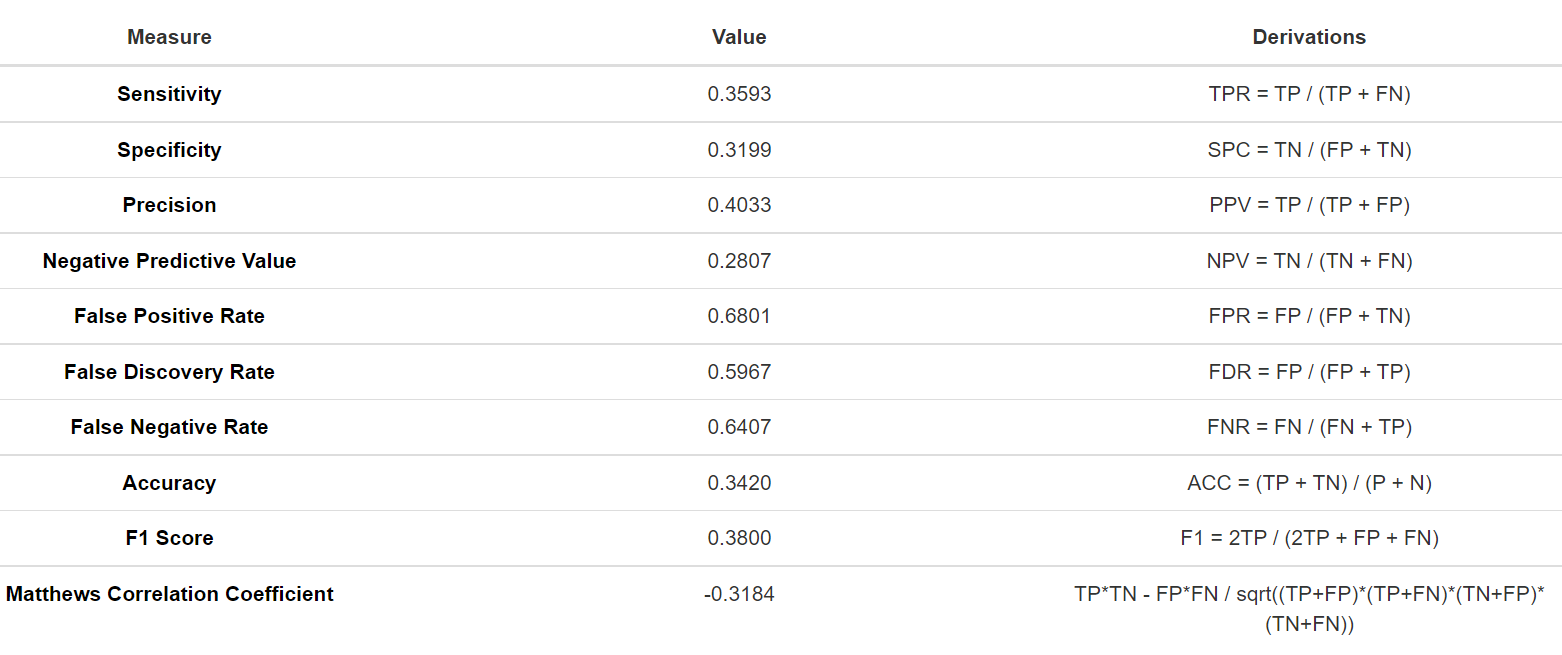

# Sklearn Agglomerative Clustering on pca_np_sk (dimensionally reduced dataframe of PCA())

In [ ]:
# from sklearn.cluster import AgglomerativeClustering as AC
# aggcluster2=AC(n_clusters=2).fit_predict(pca_np_sk)

In [ ]:
# pca_np_sk.shape

In [ ]:
# cm_matrix3 = pd.DataFrame(data = confusion_matrix(pd.Series(y_true, dtype=int), pd.Series(aggcluster2)), columns = ['Actual Positive', 'Actual Negative'], index = ['Predicted Positive', 'Predict Negative'])
# sns.heatmap(cm_matrix3, annot=True, fmt='d').set(title='CM for Agglomerative Clustering')

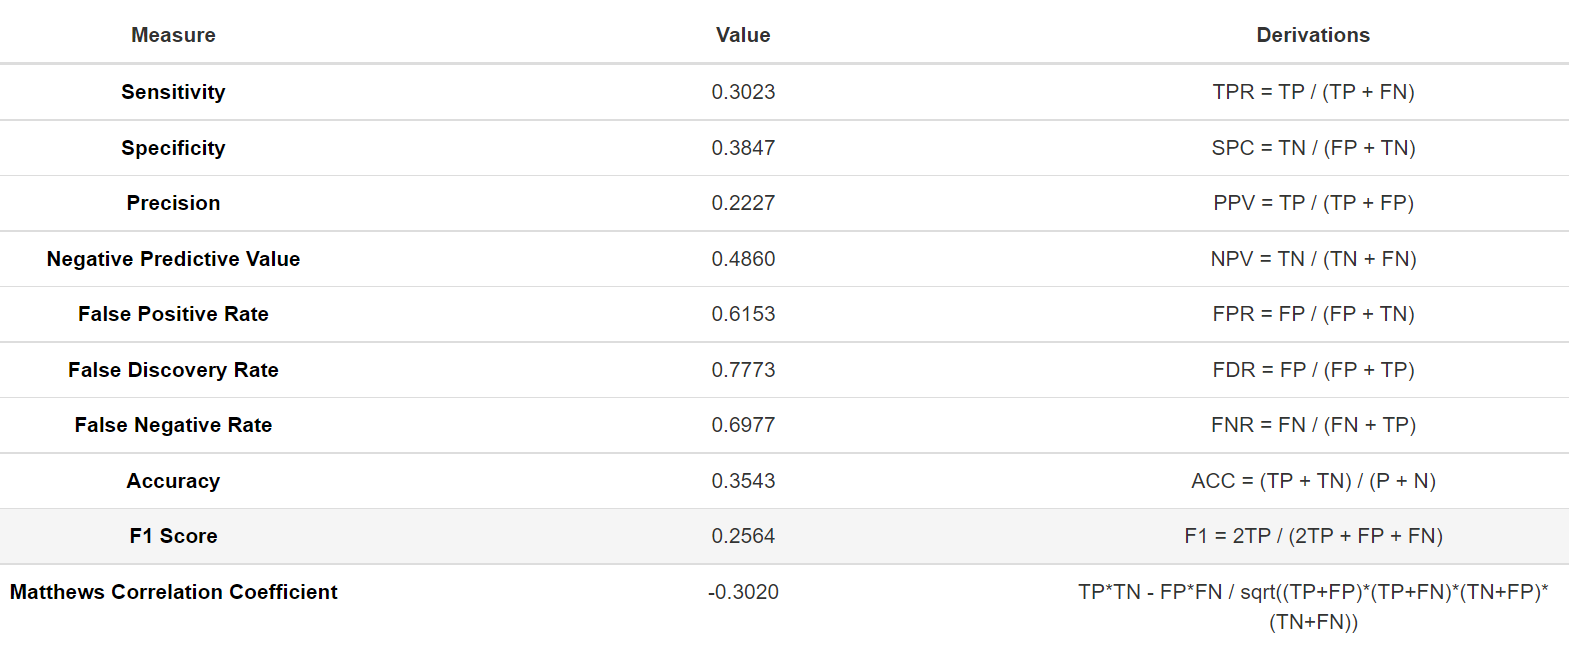

# Sklearn Agglomerative Clustering on X1_np (full dataframe)

In [ ]:
# from sklearn.cluster import AgglomerativeClustering as AC
# aggcluster3=AC(n_clusters=2).fit_predict(X1_np)

In [ ]:
# X1_np.shape

In [ ]:
# cm_matrix3 = pd.DataFrame(data = confusion_matrix(pd.Series(y_true, dtype=int), pd.Series(aggcluster3)), columns = ['Actual Positive', 'Actual Negative'], index = ['Predicted Positive', 'Predict Negative'])
# sns.heatmap(cm_matrix3, annot=True, fmt='d').set(title='CM for Agglomerative Clustering')

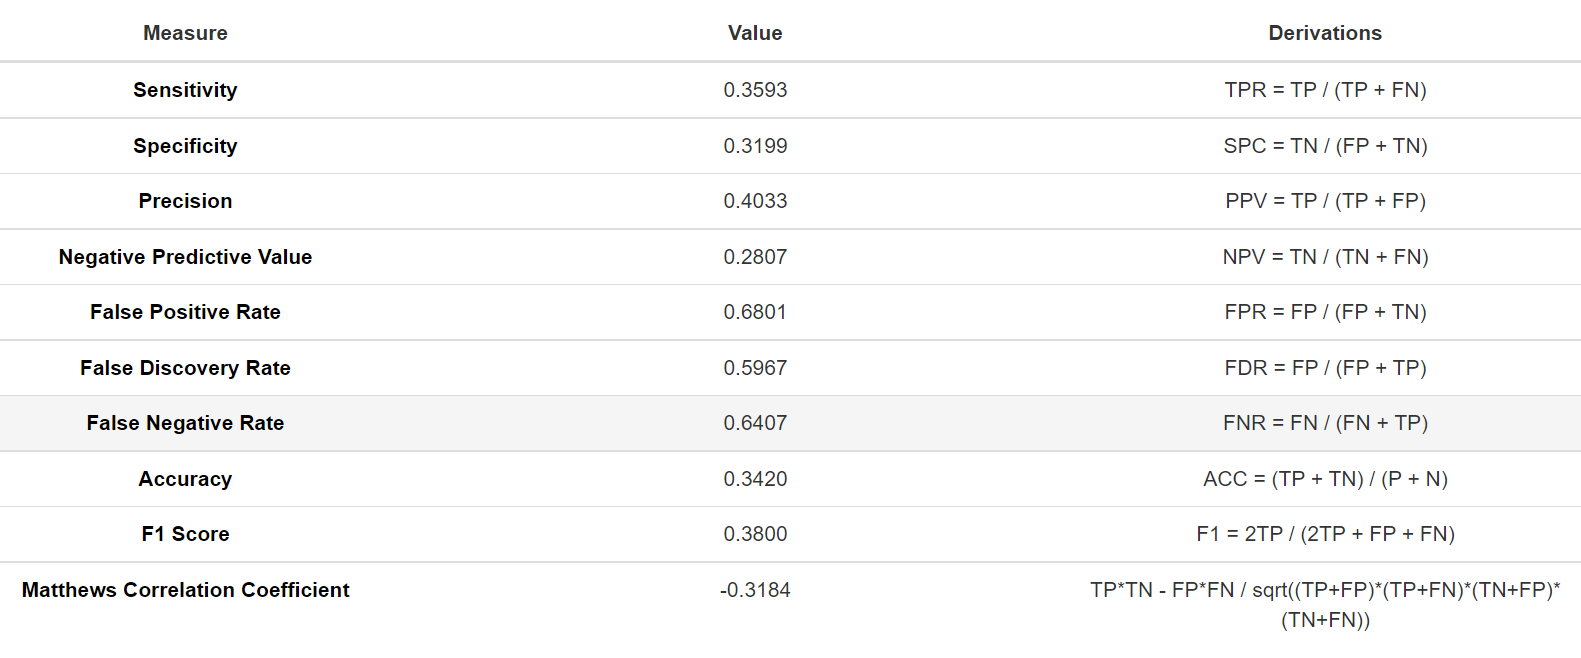

Agglomerative Clustering Analysis through Clustimage library

In [ ]:
# !pip install clustimage
# from clustimage import Clustimage
# cl = Clustimage(method='pca', grayscale=True)
# Xda = cl.import_data(X1_np)
# Xfeat = cl.extract_feat(Xda)
# xycoord = cl.embedding(Xfeat)

In [ ]:
# labels = cl.cluster(cluster='agglomerative',
#                     evaluate='silhouette',
#                     metric='euclidean',
#                     linkage='ward',
#                     min_clust=3,
#                     max_clust=25,
#                     cluster_space='high')

In [ ]:
# # Return
# results = cl.results

In [ ]:
# # Results are stored as a dictionary:
# cl.results.keys()

# # 'feat'      : Extracted features.
# # 'xycoord'   : The X and Y coordinates from tSNE embedding
# # 'pathnames' : The path locations of the processed images
# # 'filenames' : The filename of the image
# # 'labels'    : The cluster labels

In [ ]:
# # Silhouette plots
# cl.clusteval.plot()
# cl.clusteval.scatter(cl.results['xycoord'])

# # PCA explained variance plot
# cl.pca.plot()

# # Dendrogram
# cl.dendrogram()

# # Plot unique image per cluster
# cl.plot_unique(img_mean=False)

# # Scatterplot
# cl.scatter(zoom=3, img_mean=False)
# cl.scatter(zoom=None, img_mean=False)

# # Plot images per cluster or all clusters
# cl.plot(cmap='binary', labels=[1,2])
# cl.plot(cmap='binary')